# Importation des packages


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import fanalysis.mca as MCA
import numpy as np

# Importation et nettoyage des données

In [2]:
credit_data=pd.read_csv("credit_data_set.csv",sep=";")

In [3]:
# Afficher les première lignes
credit_data.head()

Marche      Apport      Impaye       Assurance Endettement  \
0  Renovation  pas_Apport       Imp_0             AID       End_1   
1  Renovation  pas_Apport       Imp_0  Sans Assurance       End_2   
2     Voiture      Apport       Imp_0             AID       End_3   
3  Renovation  pas_Apport       Imp_0          Senior       End_2   
4     Scooter      Apport  Imp_3 et +             AID       End_4   

       Famille Enfants                 Logement            Profession  \
0  Union libre   Enf_0      Loge par la famille  Ouvrier non qualifie   
1        Marie   Enf_0             Proprietaire      Ouvrier qualifie   
2        Marie   Enf_1  Accedant a la propriete      Ouvrier qualifie   
3         Veuf   Enf_0             Proprietaire              Retraite   
4  Union libre   Enf_0     Loge par l'employeur           Cadre moyen   

  Intitule  Age  
0       MR   50  
1       MR   40  
2       MR   30  
3       MR   60  
4       MR   20

In [4]:
# Type de données dans la base
credit_data.dtypes

Marche         object
Apport         object
Impaye         object
Assurance      object
Endettement    object
Famille        object
Enfants        object
Logement       object
Profession     object
Intitule       object
Age             int64
dtype: object

In [39]:
# Description de la base de données
credit_data.describe(include="all")

Marche  Apport Impaye Assurance Endettement Famille Enfants  \
count           66      66     66        66          66      66      66   
unique           6       2      3         4           4       5       5   
top     Renovation  Apport  Imp_0       AID       End_3   Marie   Enf_0   
freq            18      35     42        31          19      25      39   
mean           NaN     NaN    NaN       NaN         NaN     NaN     NaN   
std            NaN     NaN    NaN       NaN         NaN     NaN     NaN   
min            NaN     NaN    NaN       NaN         NaN     NaN     NaN   
25%            NaN     NaN    NaN       NaN         NaN     NaN     NaN   
50%            NaN     NaN    NaN       NaN         NaN     NaN     NaN   
75%            NaN     NaN    NaN       NaN         NaN     NaN     NaN   
max            NaN     NaN    NaN       NaN         NaN     NaN     NaN   

            Logement        Profession Intitule        Age Age_group  
count             66                66       66  66.000000        66  
unique             5                 5        3        NaN         5  
top     Proprietaire  Ouvrier qualifie       MR        NaN     30-39  
freq              28                18       53        NaN        21  
mean             NaN               NaN      NaN  39.393939       NaN  
std              NaN               NaN      NaN  13.686466       NaN  
min              NaN               NaN      NaN  20.000000       NaN  
25%              NaN               NaN      NaN  30.000000       NaN  
50%              NaN               NaN      NaN  40.000000       NaN  
75%              NaN               NaN      NaN  50.000000       NaN  
max              NaN               NaN      NaN  60.000000       NaN

In [40]:
# Analyse des données manquantes 
credit_data.isnull().sum()

Marche         0
Apport         0
Impaye         0
Assurance      0
Endettement    0
Famille        0
Enfants        0
Logement       0
Profession     0
Intitule       0
Age            0
Age_group      0
dtype: int64

In [41]:
# Vérification des doublons

# Vérifier les doublons
duplicates = credit_data.duplicated()
print(f"Nombre de lignes dupliquées : {duplicates.sum()}")


Nombre de lignes dupliquées : 0


In [8]:
# Analyse de outliers

In [42]:
# Transformer la variable age en variable catégorielle ne créant des groupes
# Définir les limites des groupes d'âge
age_bins = [19, 29, 39, 49, 59, 100]

# Définir les labels pour les groupes d'âge
age_labels = ['20-29', '30-39', '40-49', '50-59', '60+']

# Créer une nouvelle colonne 'Age_group' en utilisant la fonction cut()
credit_data['Age_group'] = pd.cut(credit_data['Age'], bins=age_bins, labels=age_labels, right=False)
credit_data.head()


Marche      Apport      Impaye       Assurance Endettement  \
0  Renovation  pas_Apport       Imp_0             AID       End_1   
1  Renovation  pas_Apport       Imp_0  Sans Assurance       End_2   
2     Voiture      Apport       Imp_0             AID       End_3   
3  Renovation  pas_Apport       Imp_0          Senior       End_2   
4     Scooter      Apport  Imp_3 et +             AID       End_4   

       Famille Enfants                 Logement            Profession  \
0  Union libre   Enf_0      Loge par la famille  Ouvrier non qualifie   
1        Marie   Enf_0             Proprietaire      Ouvrier qualifie   
2        Marie   Enf_1  Accedant a la propriete      Ouvrier qualifie   
3         Veuf   Enf_0             Proprietaire              Retraite   
4  Union libre   Enf_0     Loge par l'employeur           Cadre moyen   

  Intitule  Age Age_group  
0       MR   50     50-59  
1       MR   40     40-49  
2       MR   30     30-39  
3       MR   60       60+  
4       MR   20     20-29

# Analyses univariées

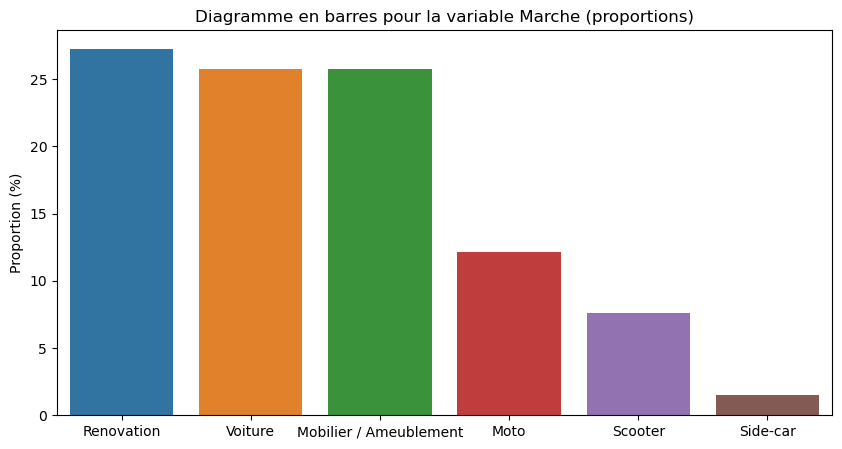

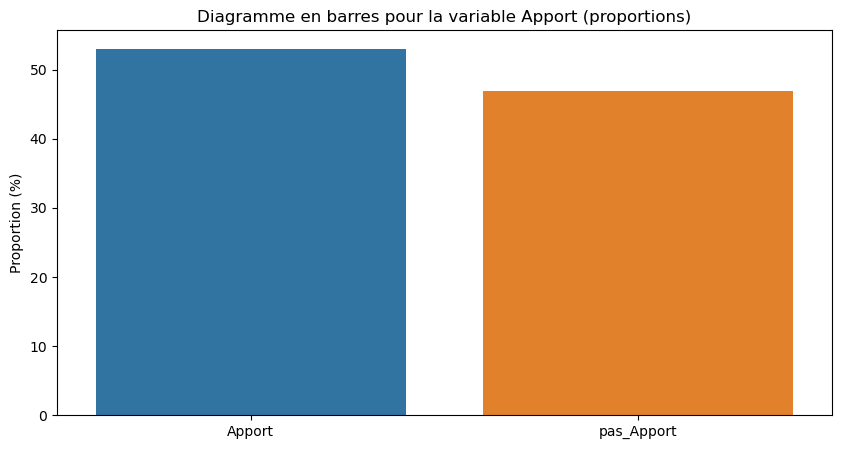

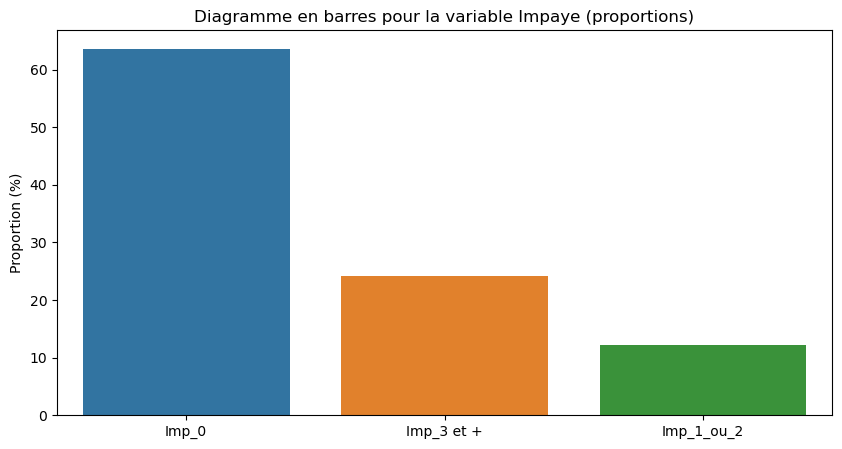

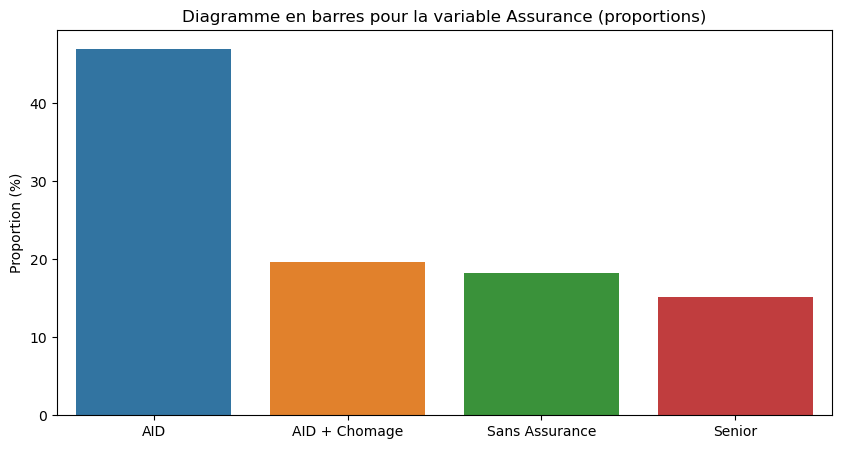

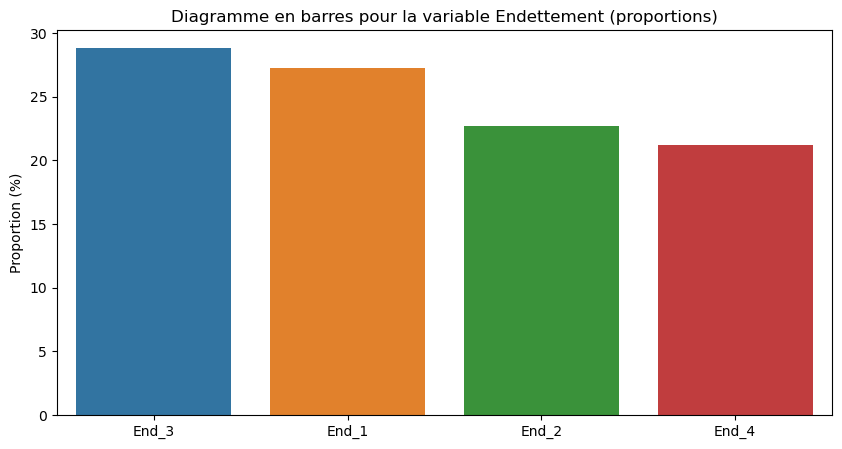

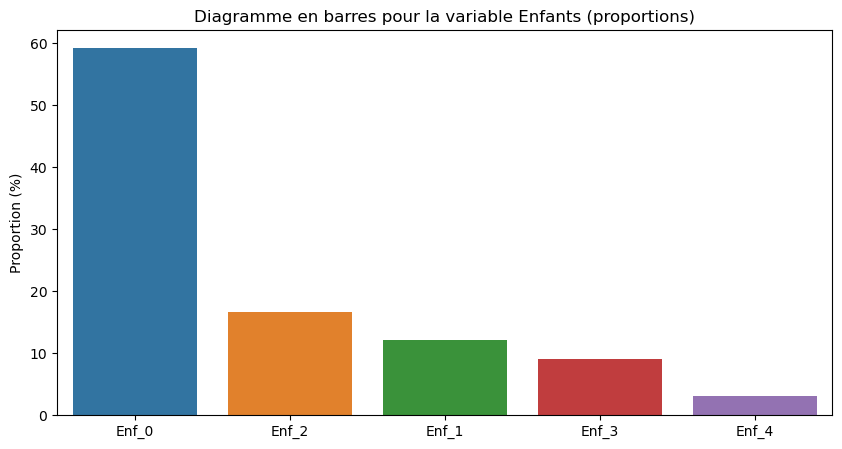

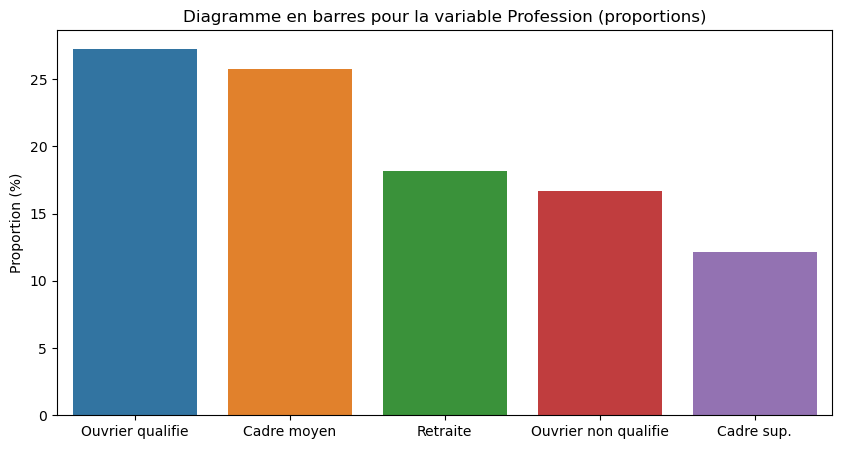

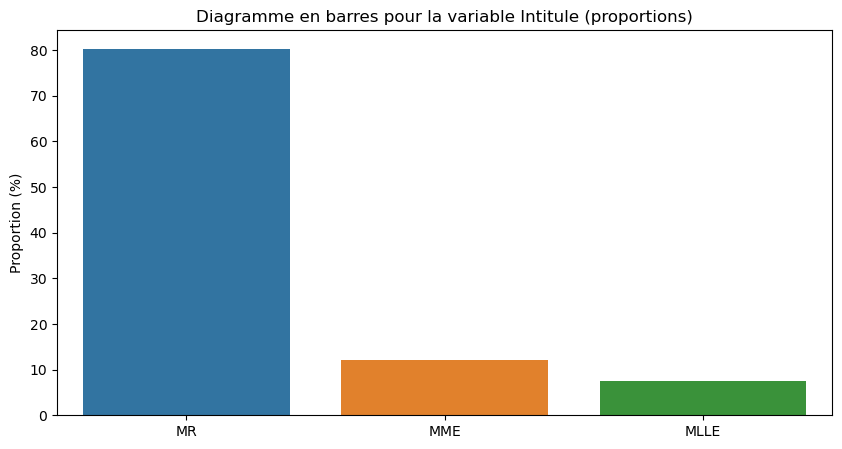

In [43]:
# Afficher les fréquences des variables catégorielles
# Liste des variables qualitatives
categorical_columns = ['Marche', 'Apport', 'Impaye', 'Assurance', 'Endettement', 'Famille', 'Enfants', 'Logement', 'Profession', 'Intitule']



# Créer des graphiques pour les variables catégorielles en termes de proportion
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    proportions = credit_data[col].value_counts(normalize=True) * 100
    sns.barplot(x=proportions.index, y=proportions.values)
    plt.title(f"Diagramme en barres pour la variable {col} (proportions)")
    plt.ylabel('Proportion (%)')
    plt.show()

In [44]:

# Afficher les fréquences des variables catégorielles
# Liste des variables qualitatives
categorical_columns = ['Marche', 'Apport', 'Impaye', 'Assurance', 'Endettement', 'Famille', 'Enfants', 'Logement', 'Profession', 'Intitule']

for col in categorical_columns:
    print(f"\nFréquences de la variable {col}:")
    print(credit_data[col].value_counts())




Fréquences de la variable Marche:
Renovation                18
Voiture                   17
Mobilier / Ameublement    17
Moto                       8
Scooter                    5
Side-car                   1
Name: Marche, dtype: int64

Fréquences de la variable Apport:
Apport        35
pas_Apport    31
Name: Apport, dtype: int64

Fréquences de la variable Impaye:
Imp_0         42
Imp_3 et +    16
Imp_1_ou_2     8
Name: Impaye, dtype: int64

Fréquences de la variable Assurance:
AID               31
AID + Chomage     13
Sans Assurance    12
Senior            10
Name: Assurance, dtype: int64

Fréquences de la variable Endettement:
End_3    19
End_1    18
End_2    15
End_4    14
Name: Endettement, dtype: int64

Fréquences de la variable Famille:
Marie          25
Celibataire    17
Union libre    13
Veuf            6
Divorce         5
Name: Famille, dtype: int64

Fréquences de la variable Enfants:
Enf_0    39
Enf_2    11
Enf_1     8
Enf_3     6
Enf_4     2
Name: Enfants, dtype: int64

Fréq

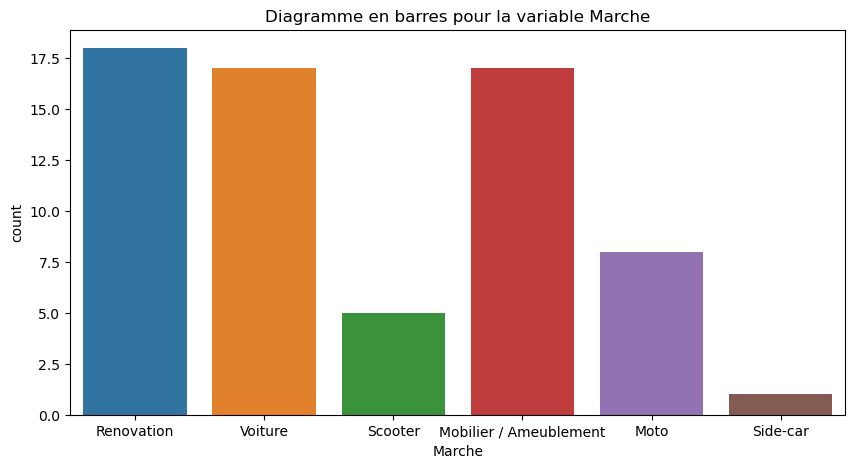

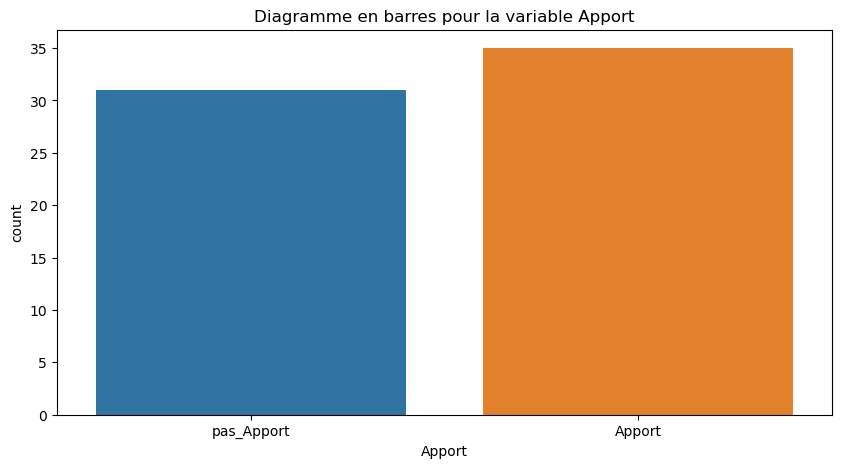

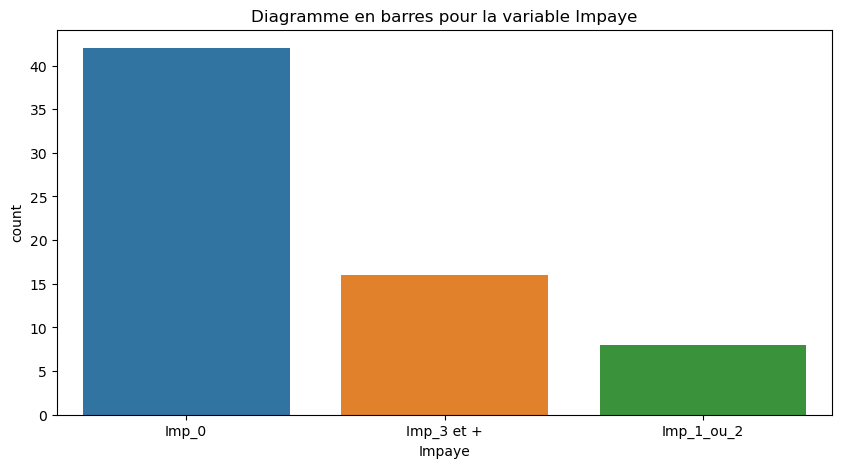

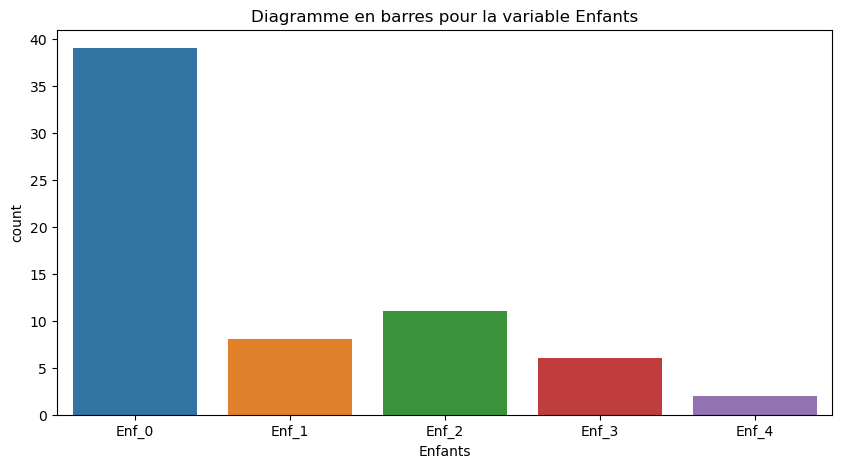

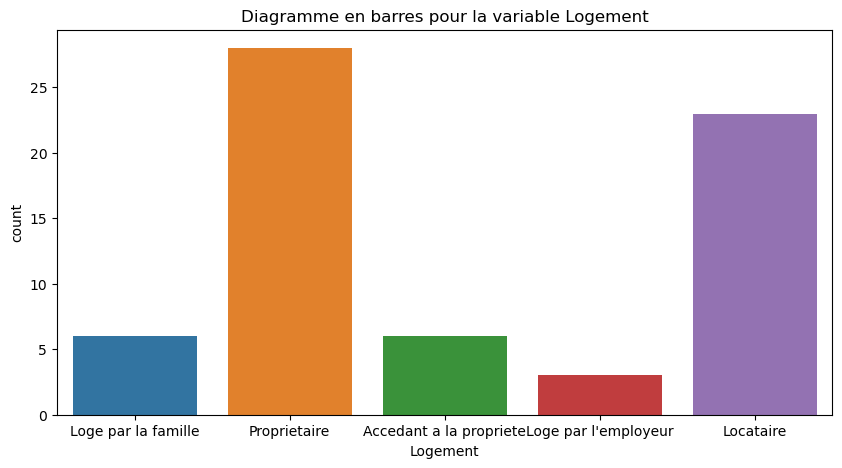

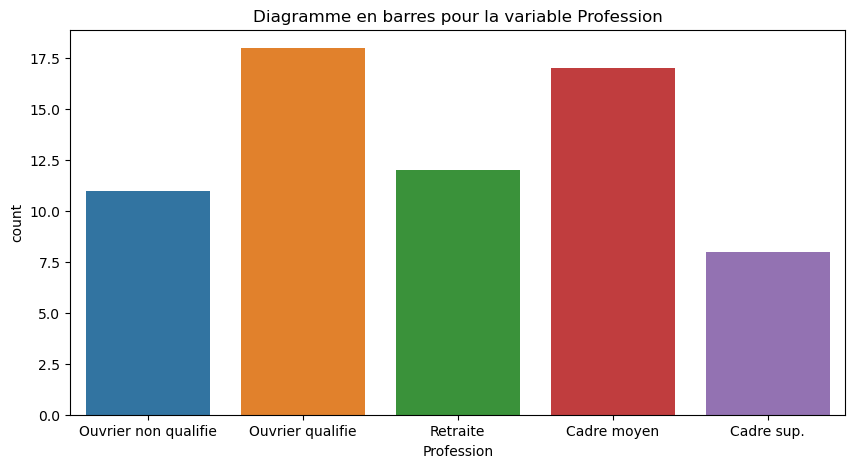

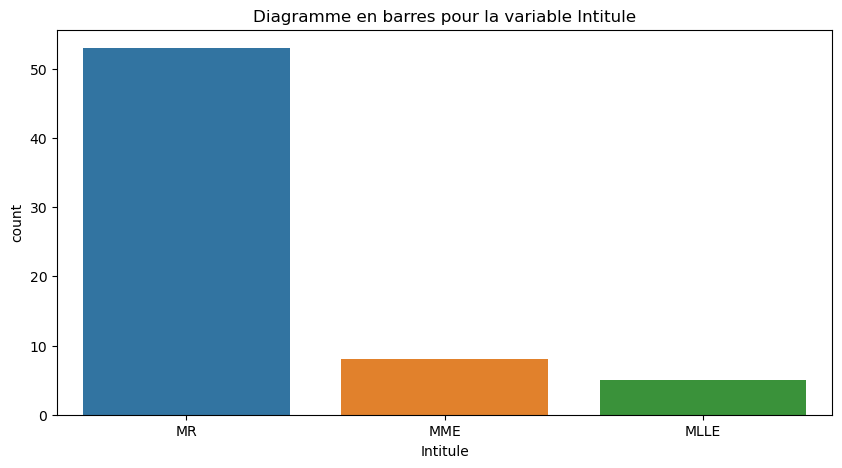

In [45]:
# Créer des graphiques pour les variables catégorielles
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=credit_data)
    plt.title(f"Diagramme en barres pour la variable {col}")
    plt.show()


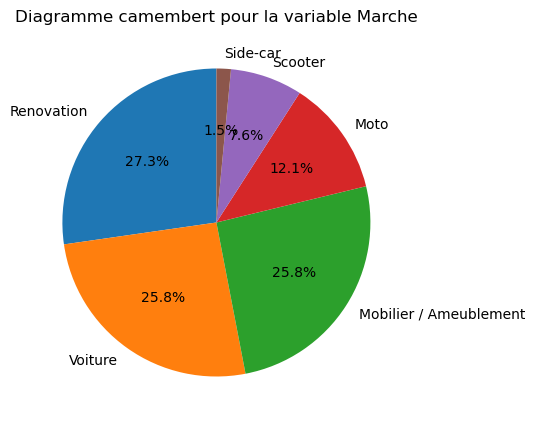

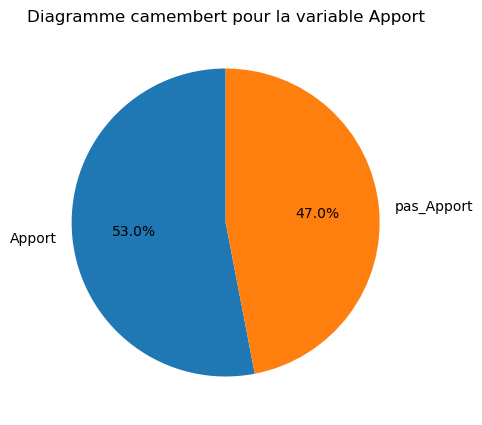

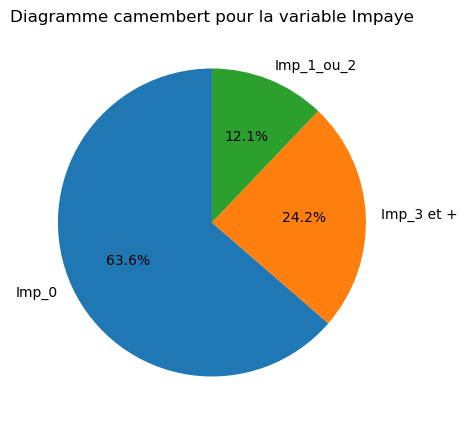

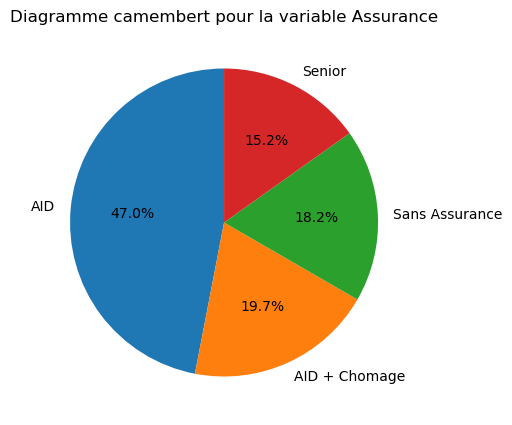

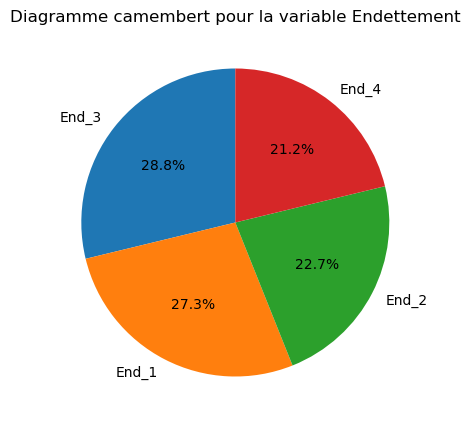

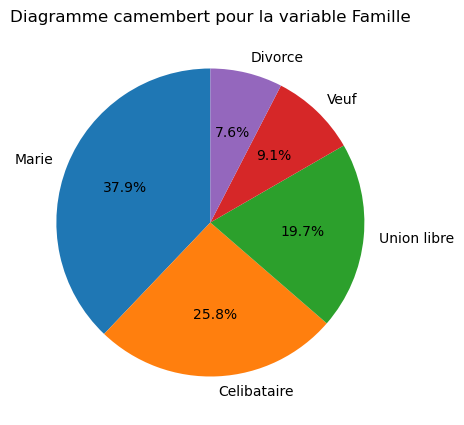

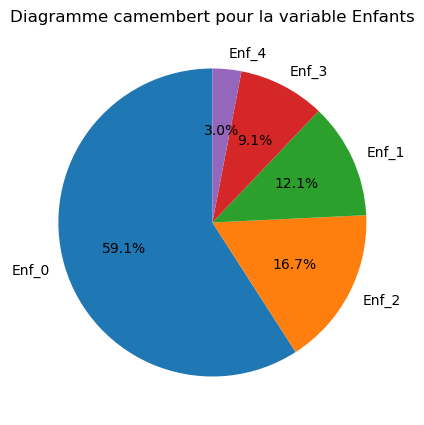

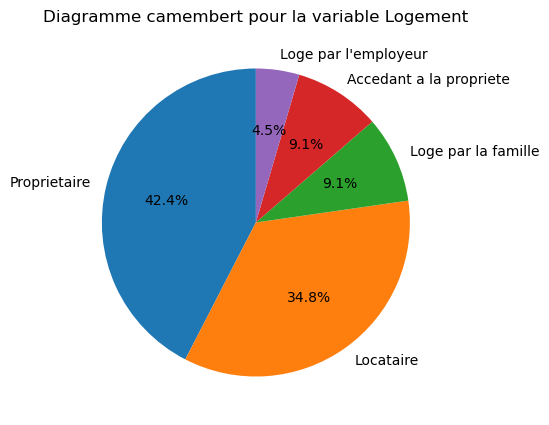

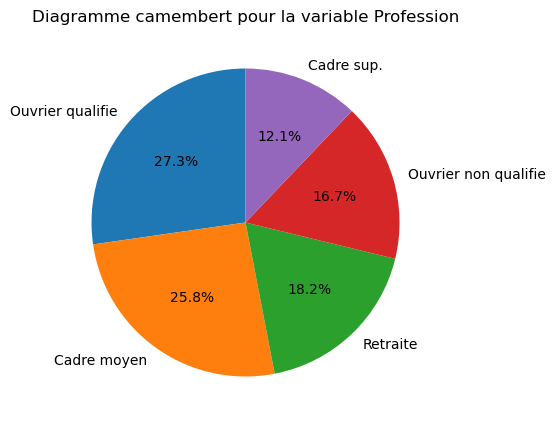

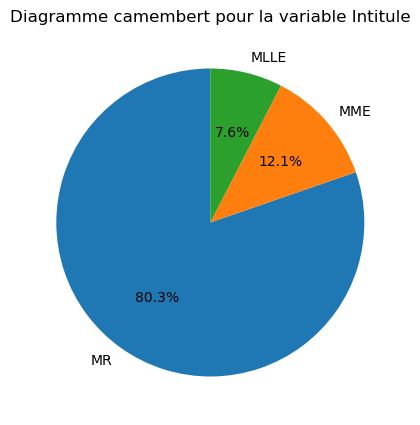

In [46]:
# Créer des graphiques camemberts pour les variables catégorielles
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    credit_data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f"Diagramme camembert pour la variable {col}")
    plt.ylabel('')
    plt.show()

# Analyses bivariées

## Graphiques

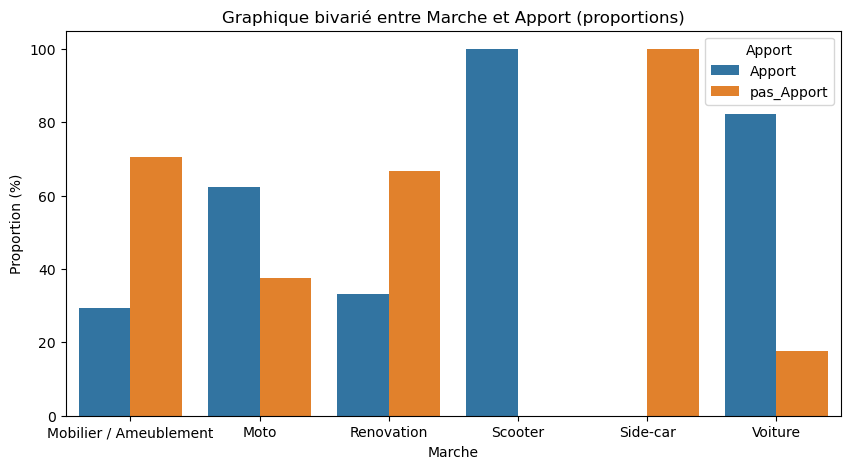

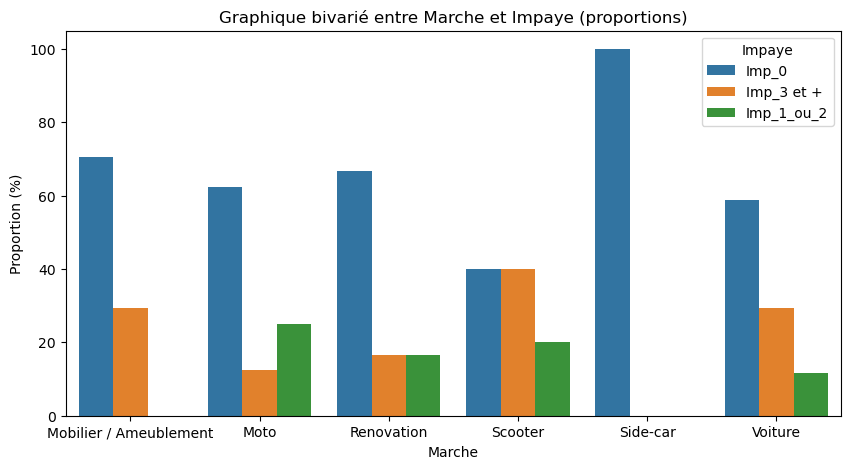

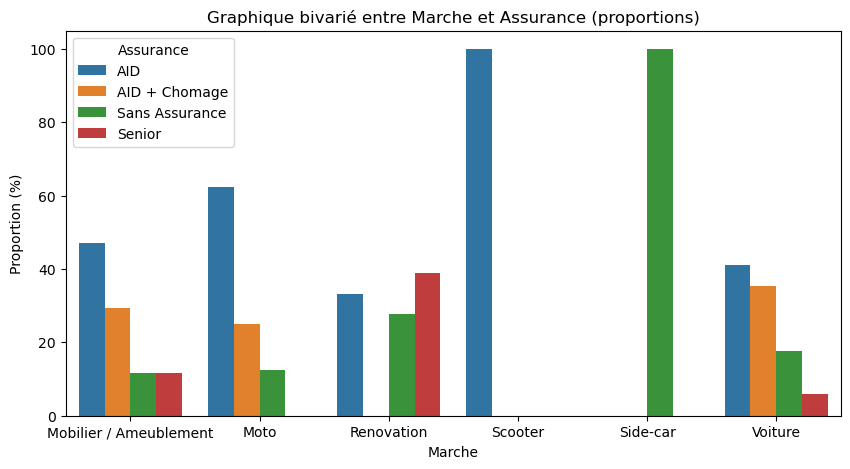

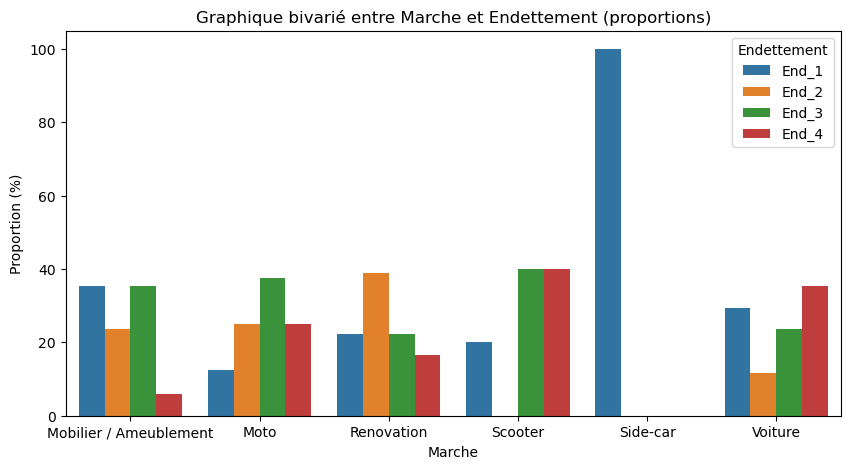

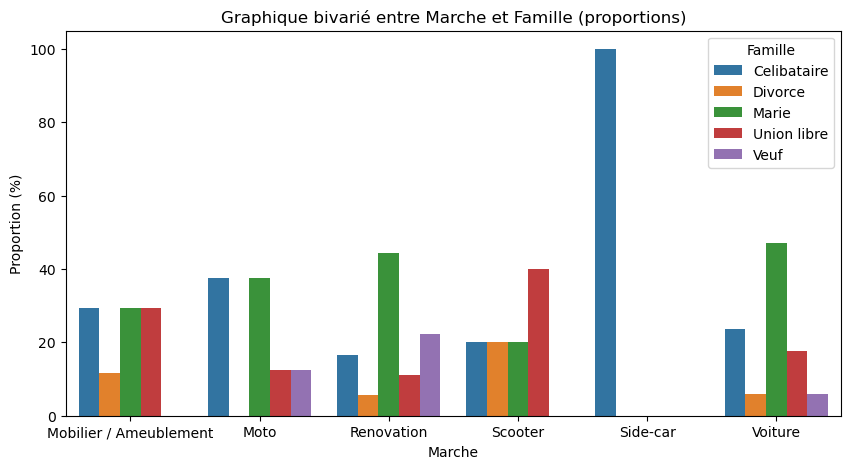

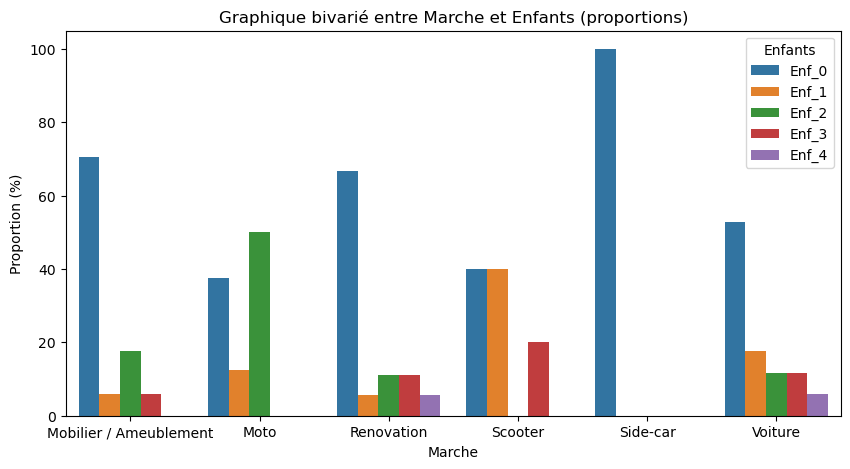

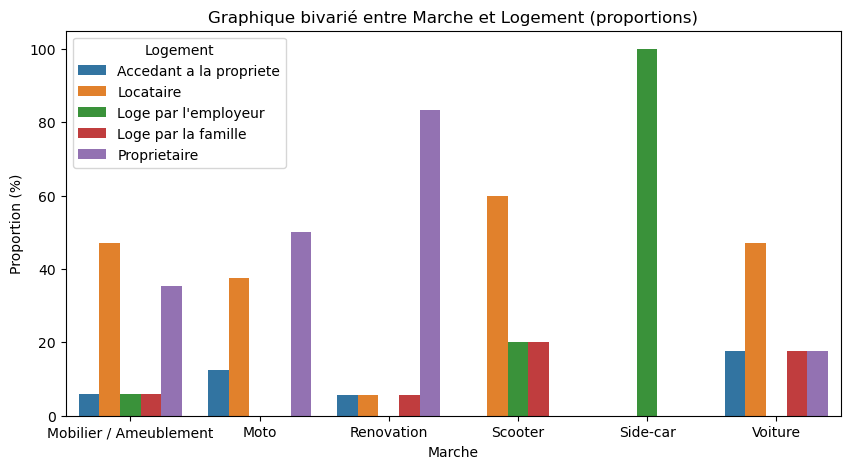

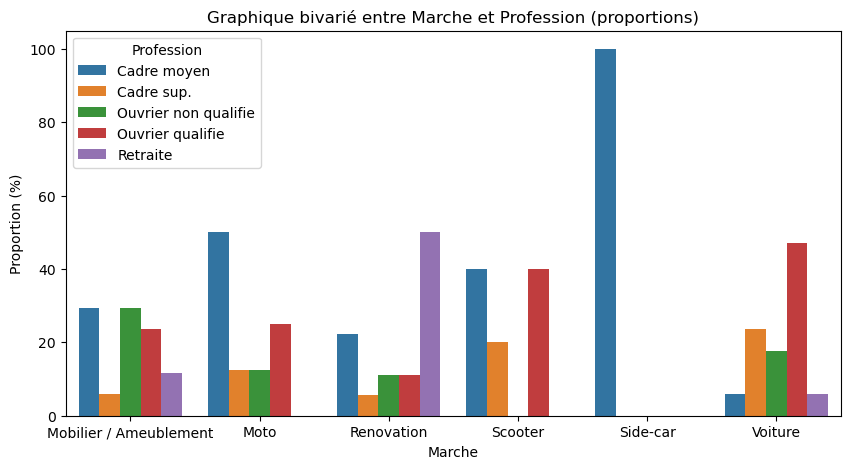

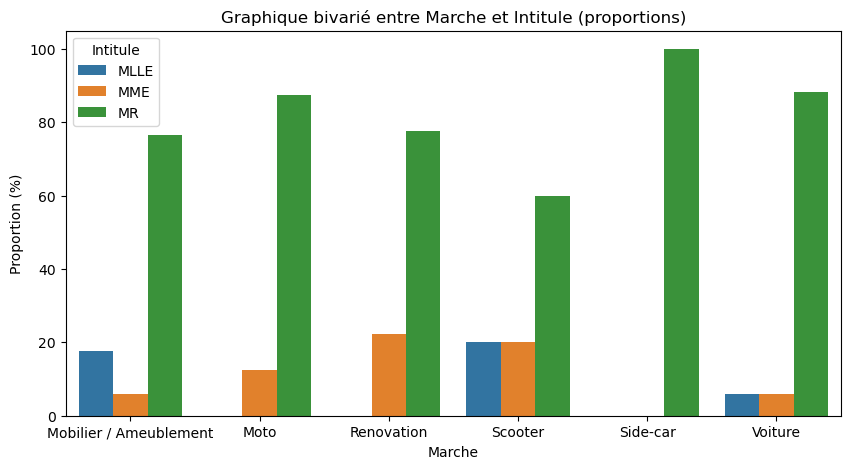

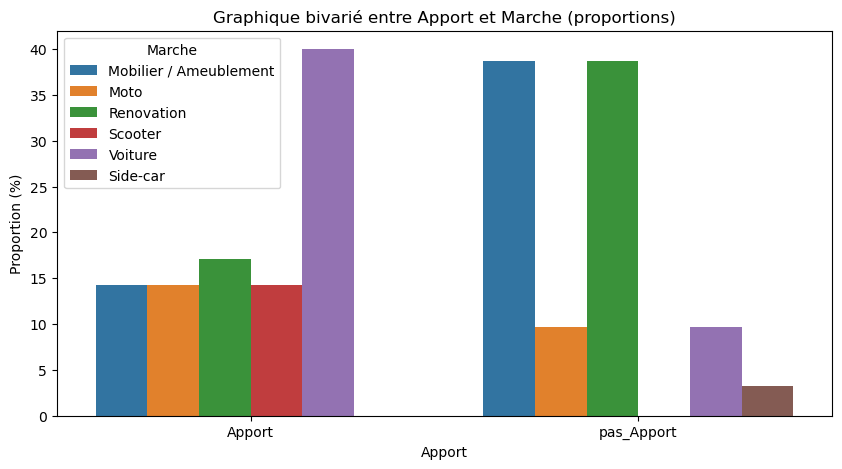

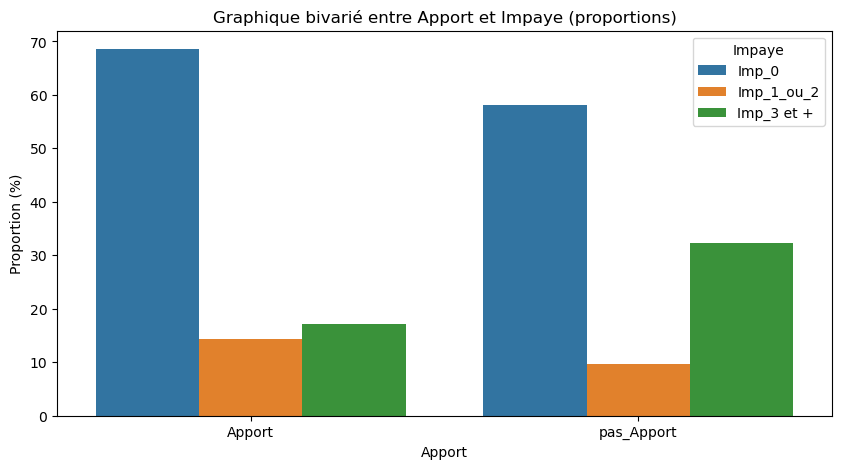

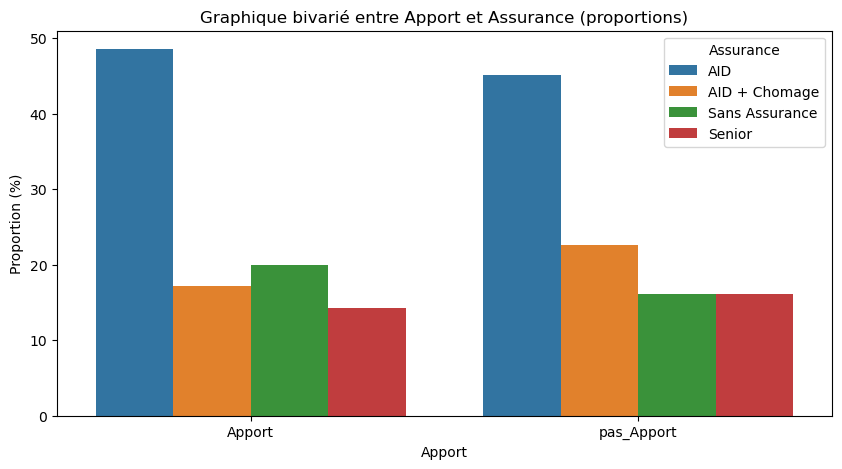

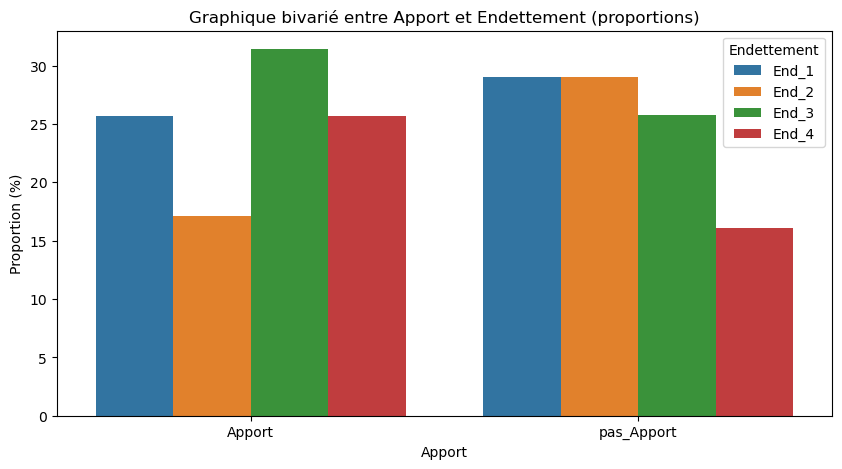

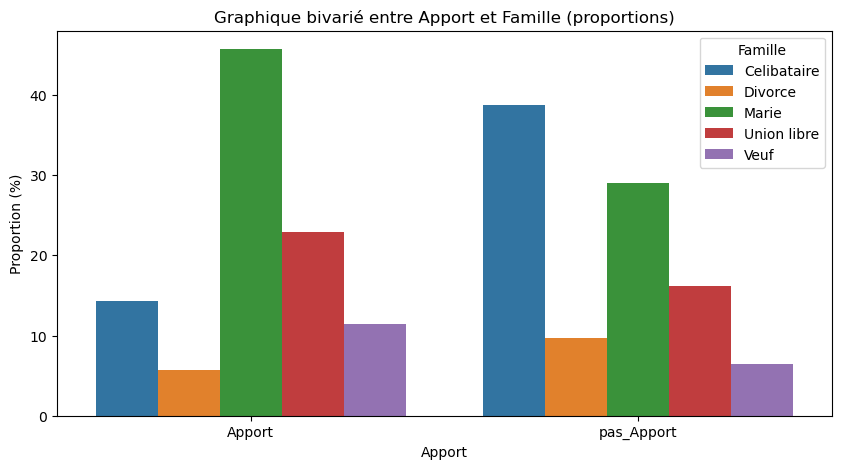

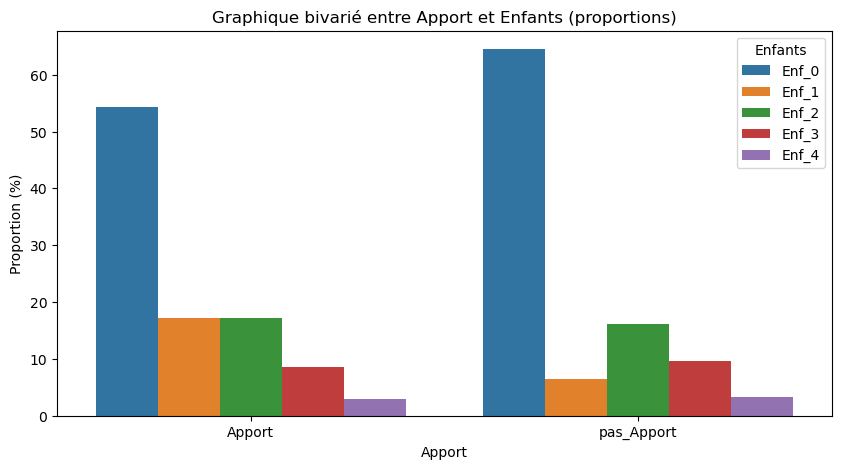

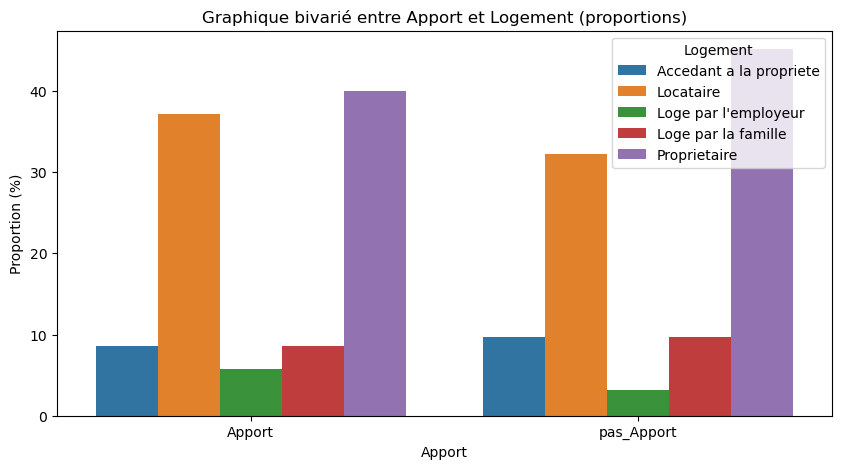

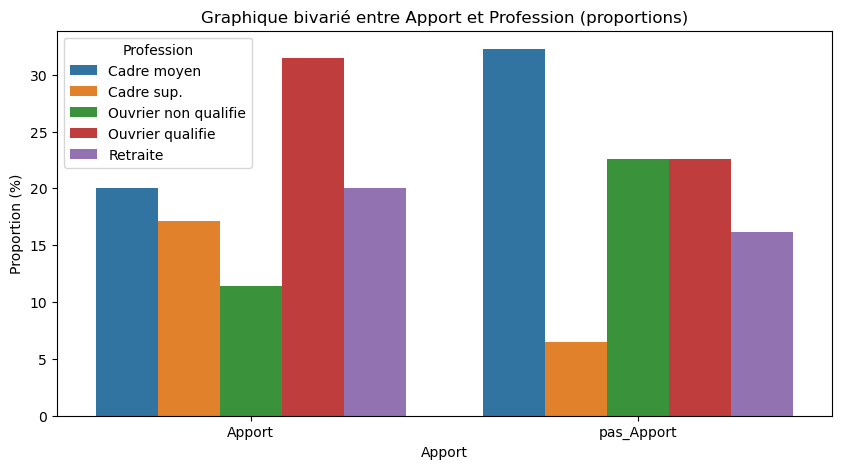

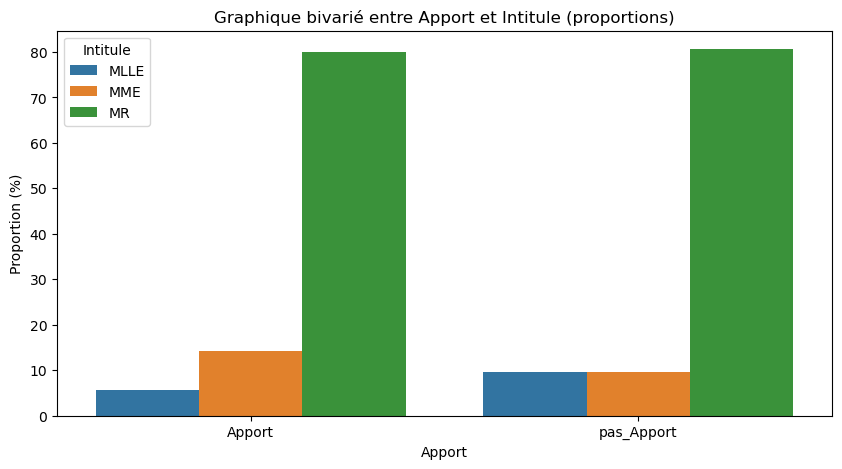

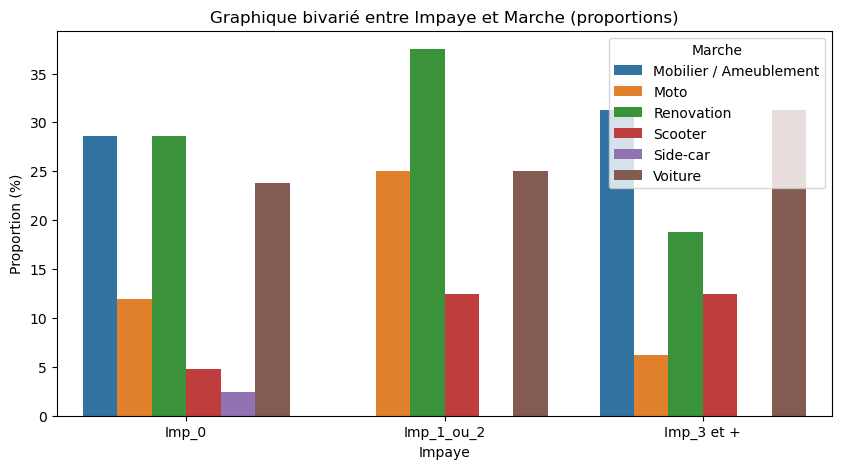

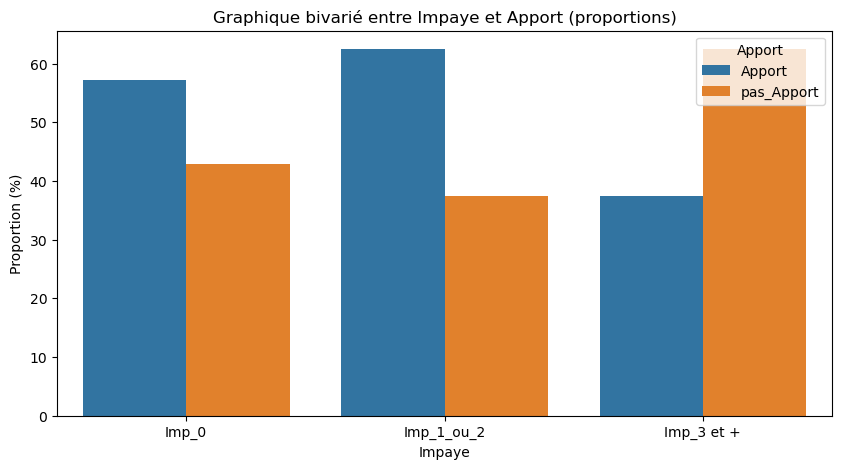

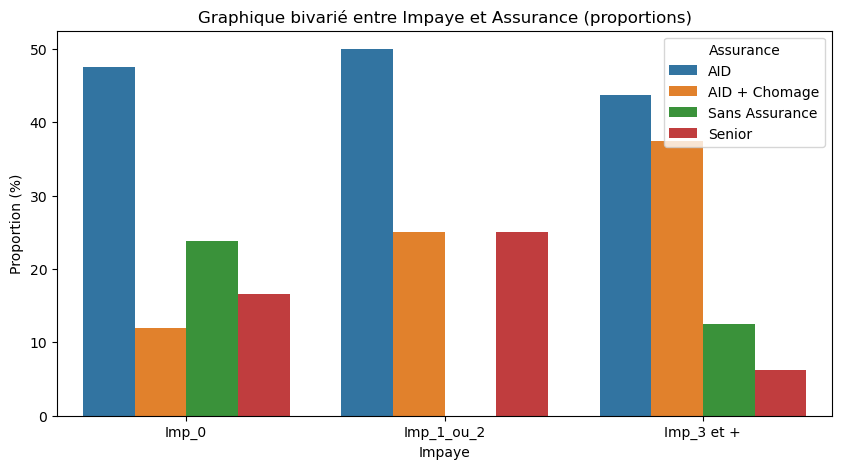

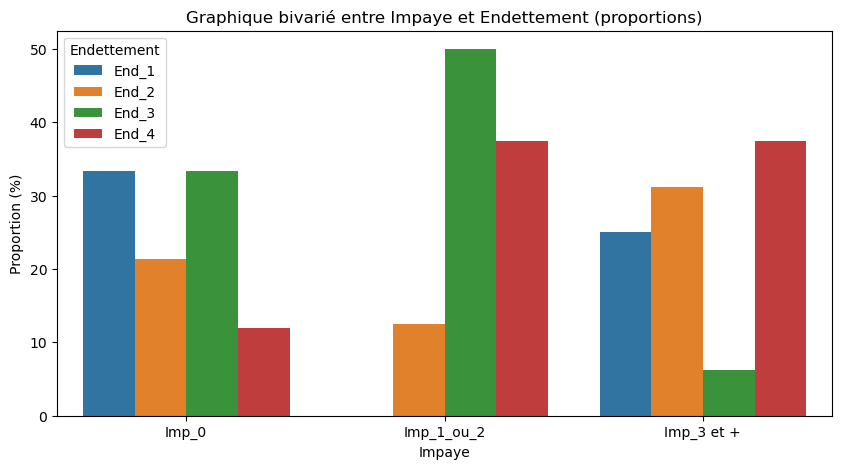

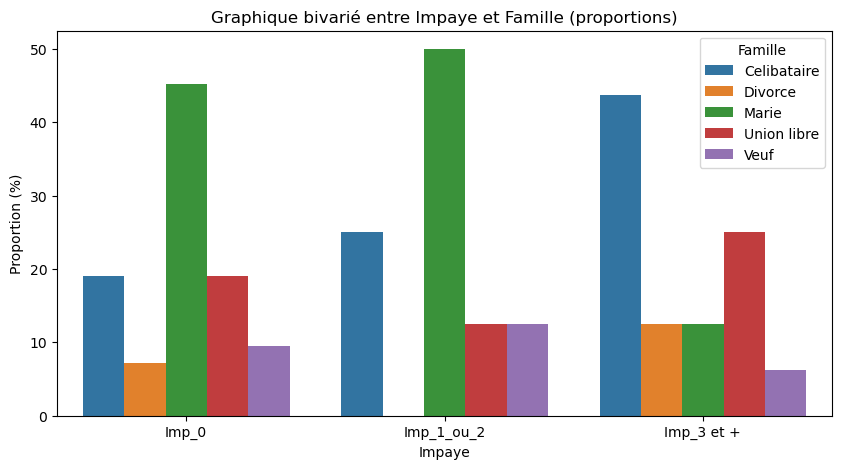

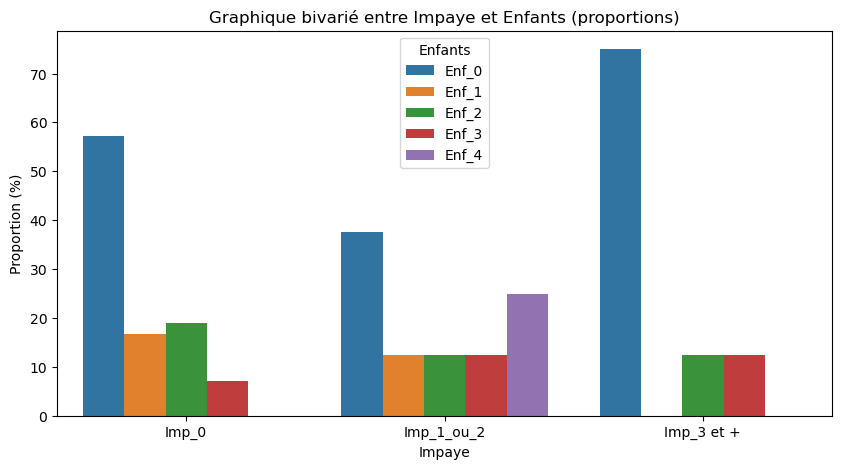

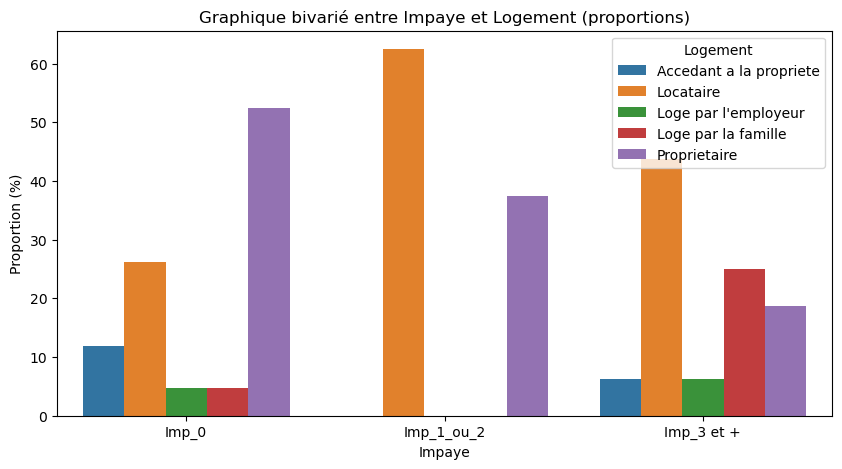

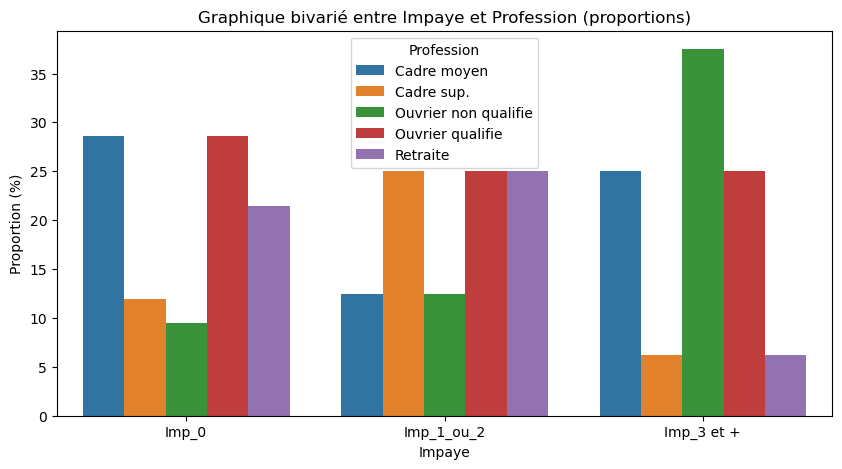

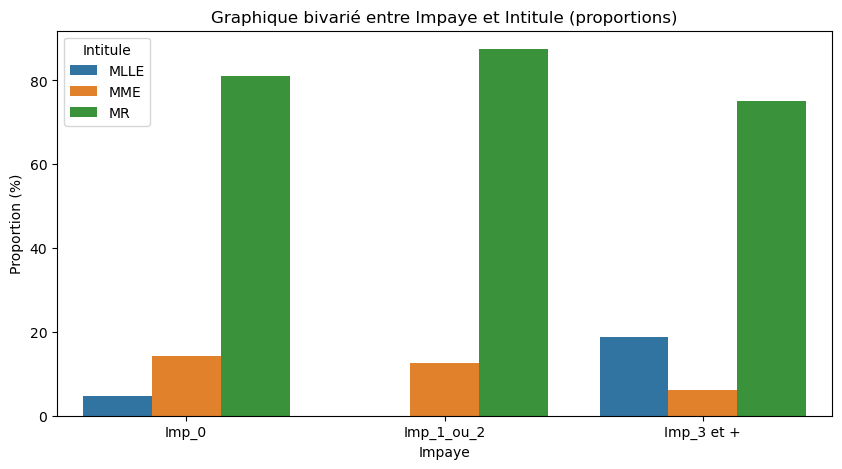

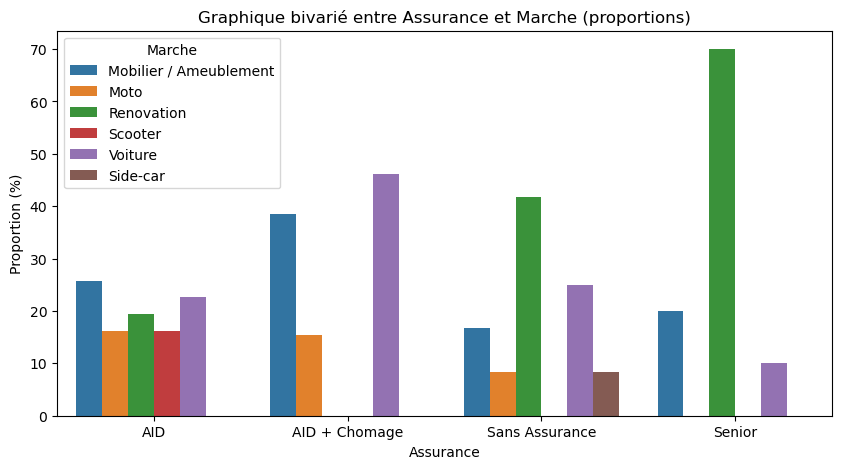

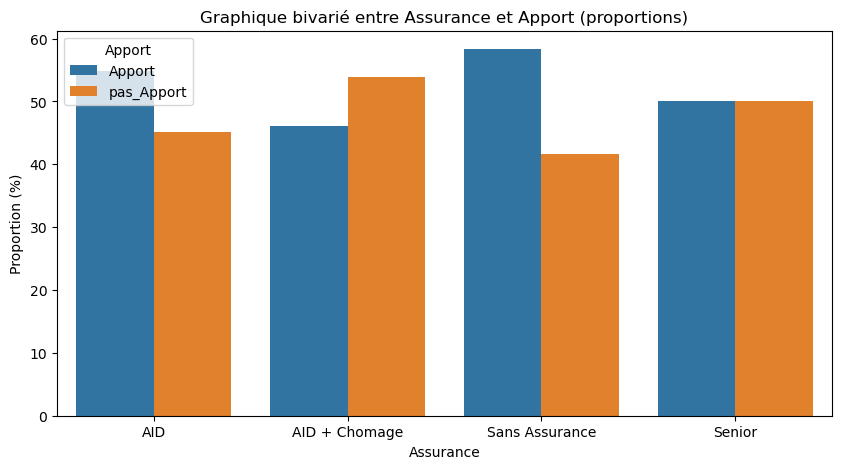

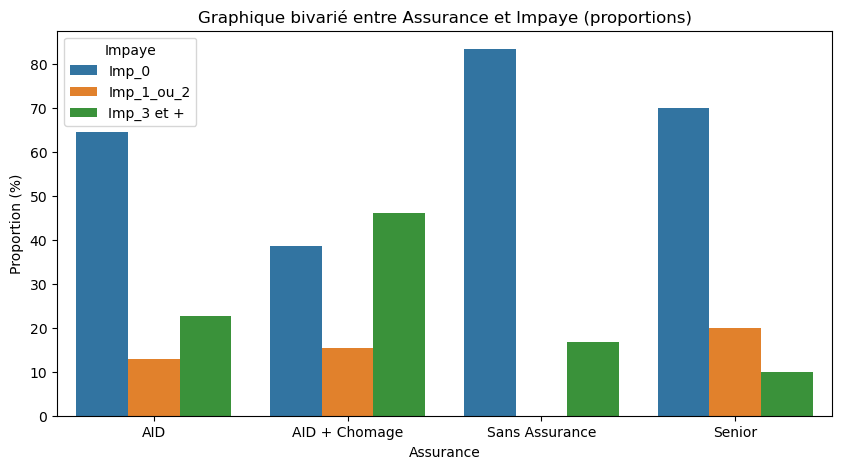

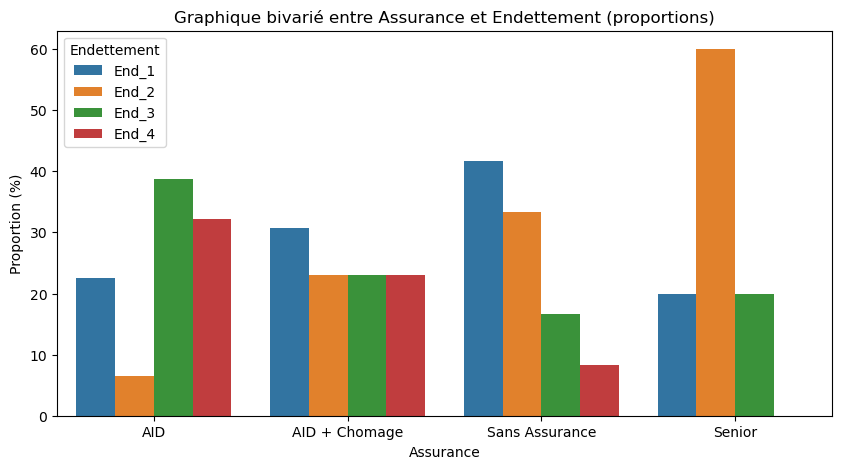

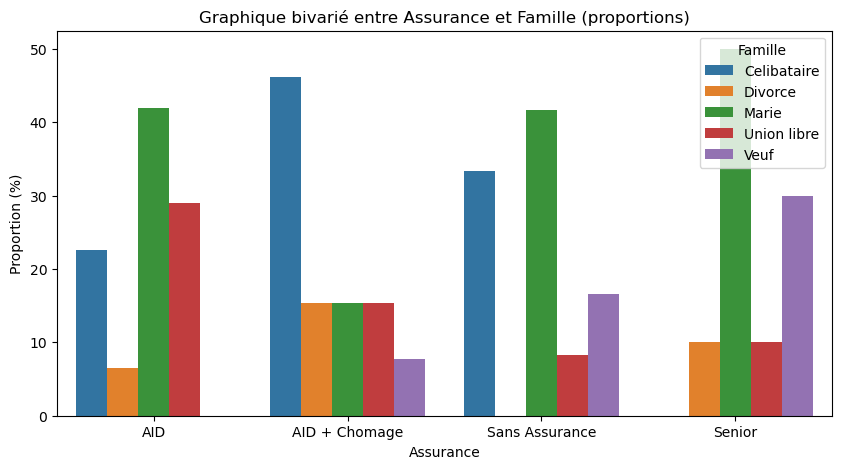

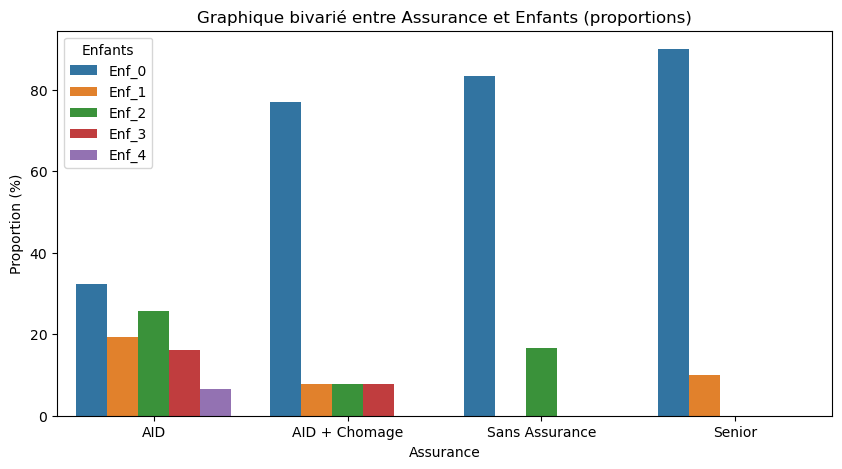

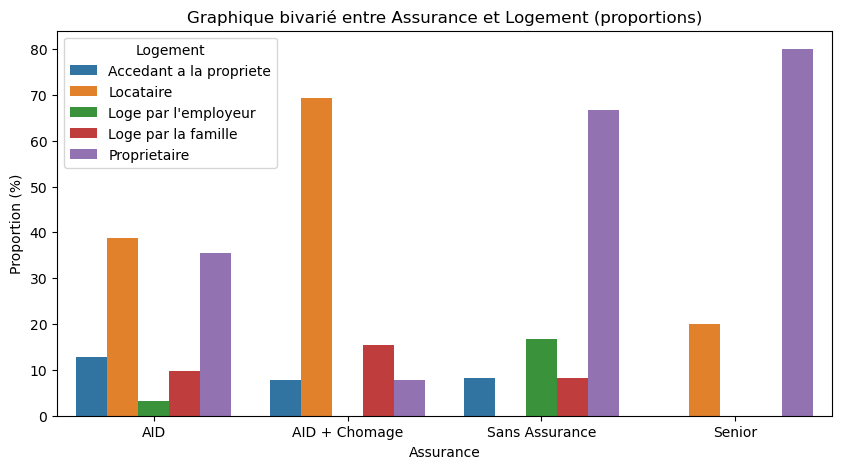

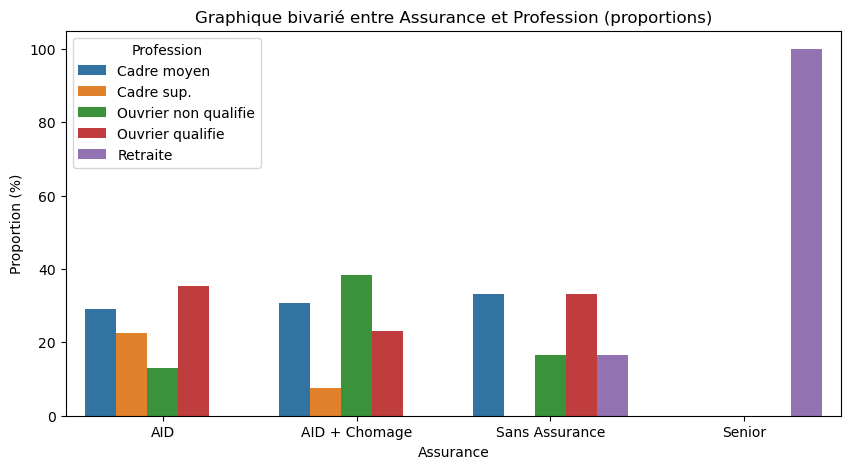

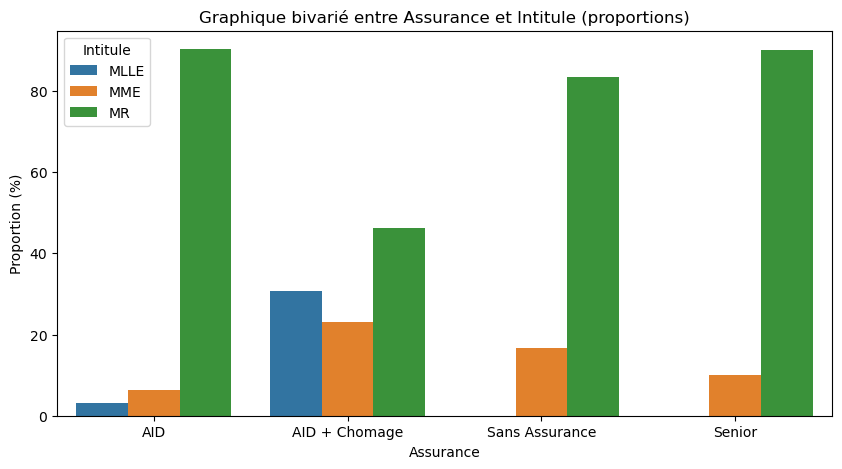

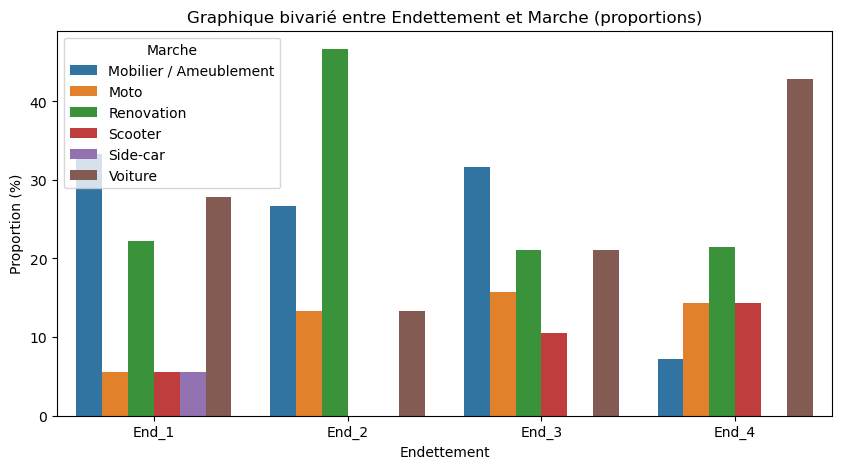

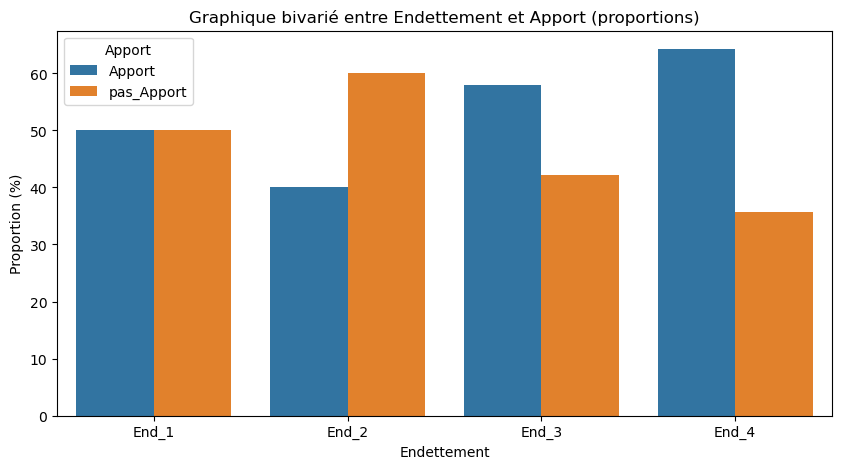

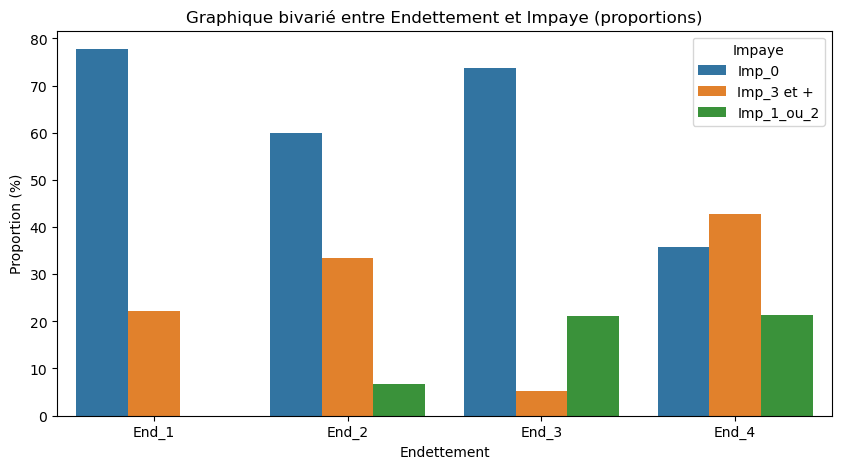

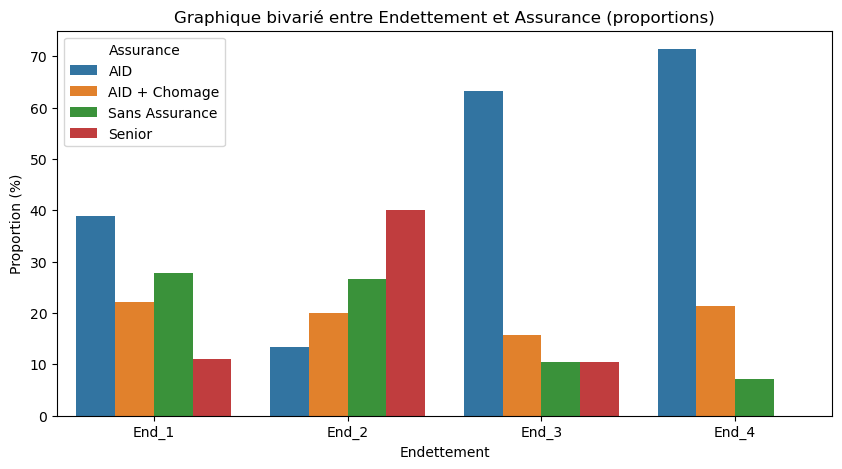

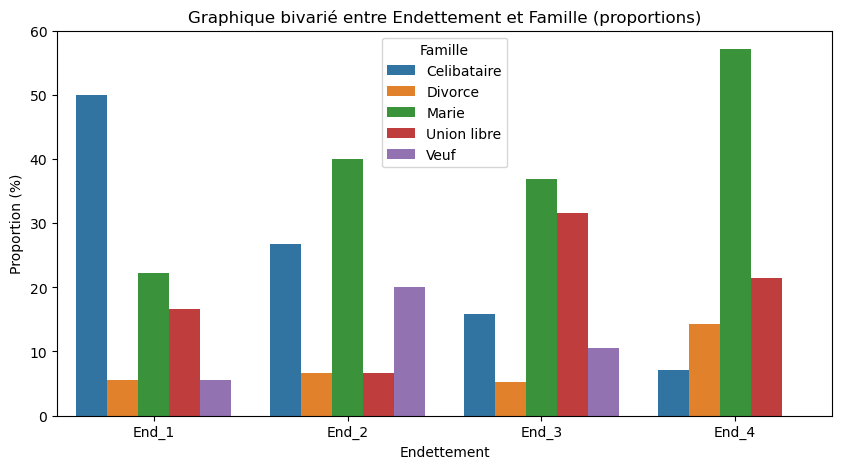

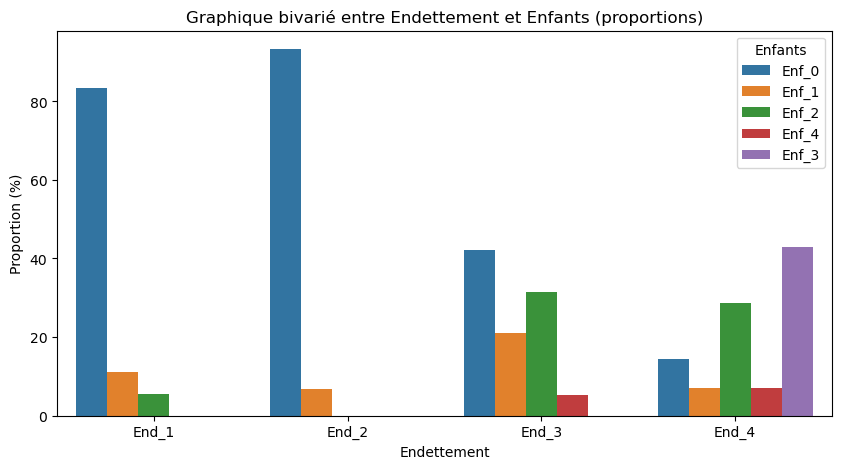

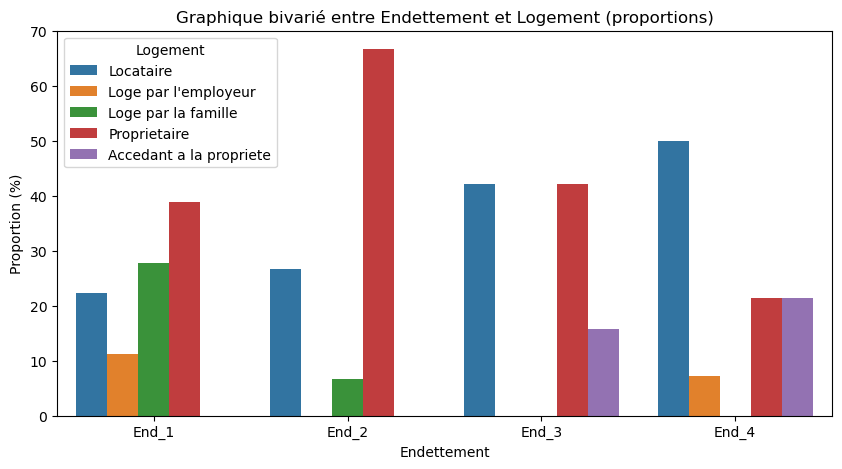

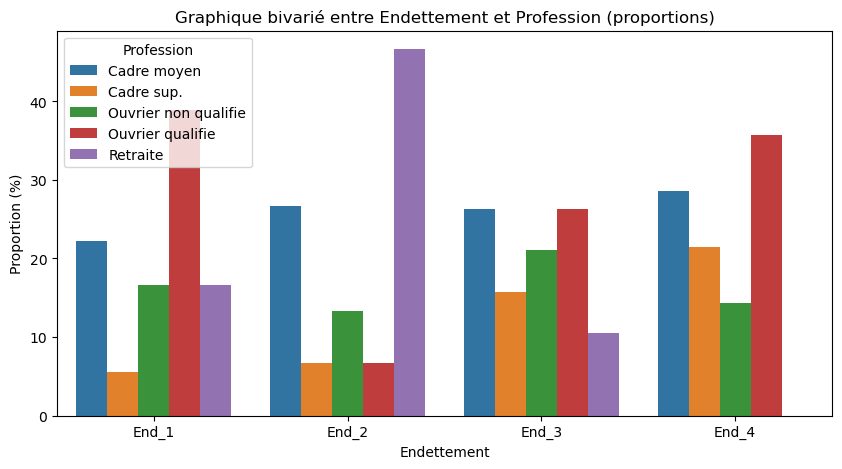

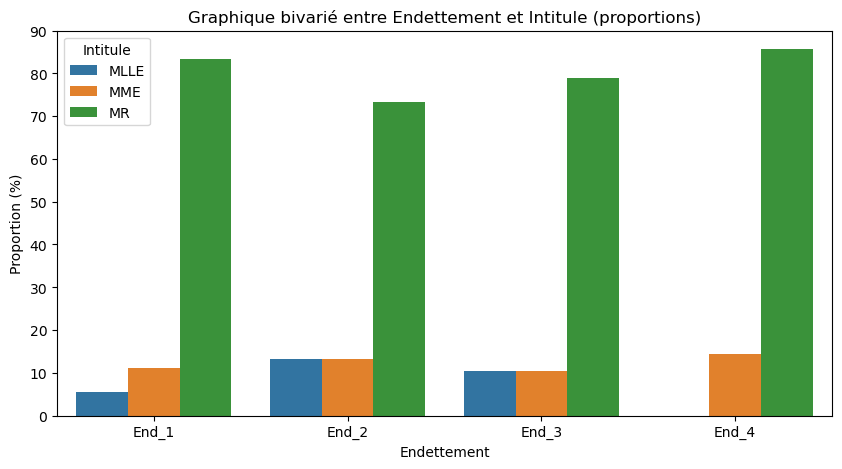

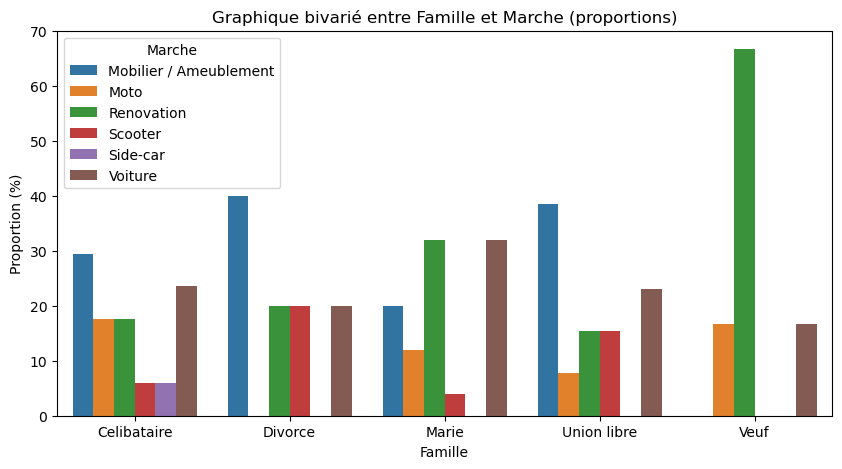

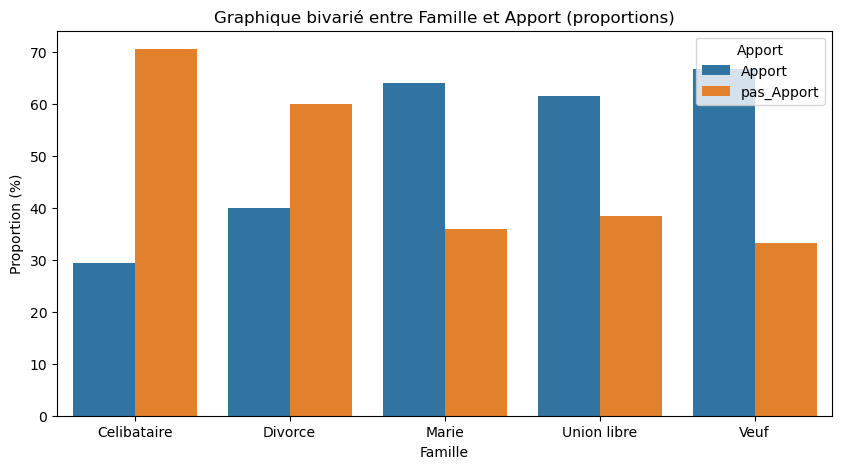

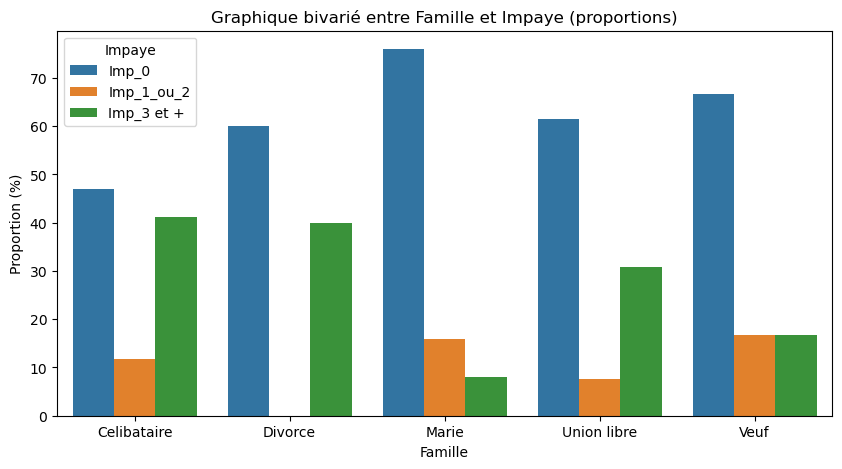

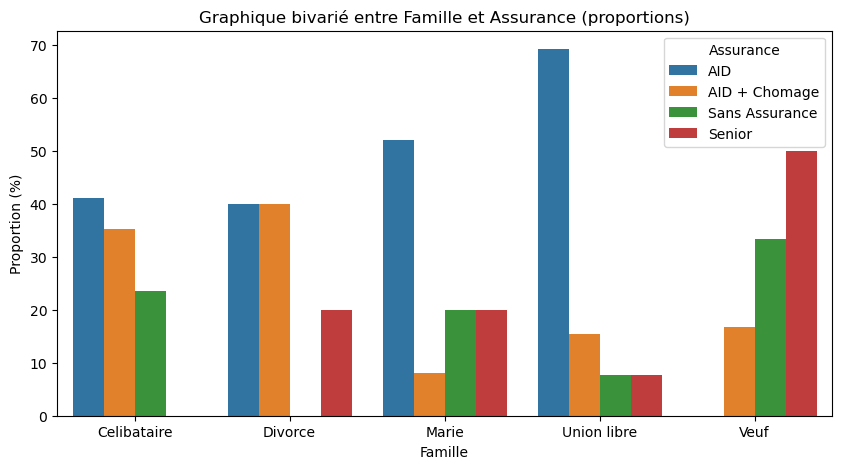

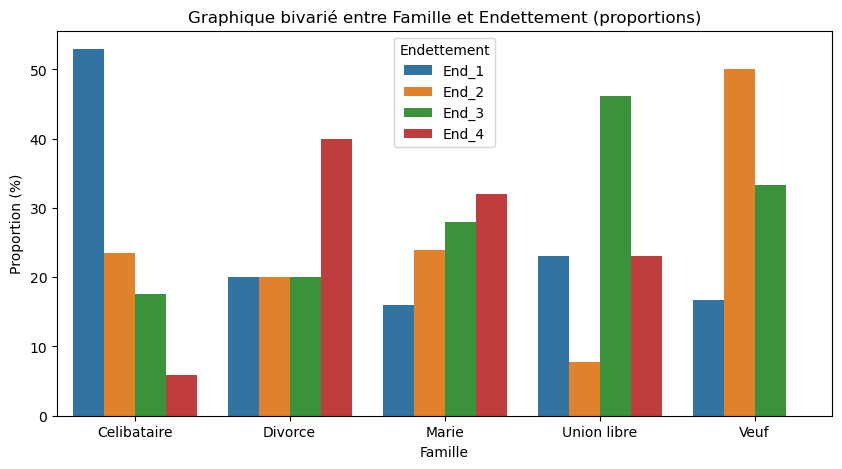

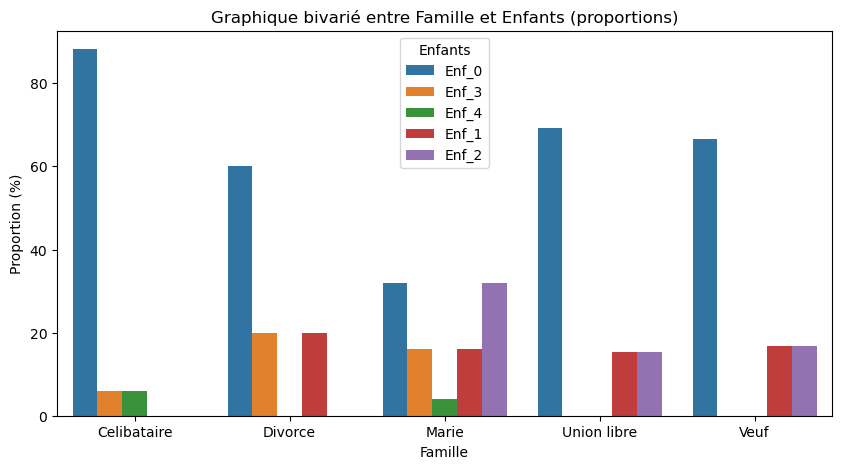

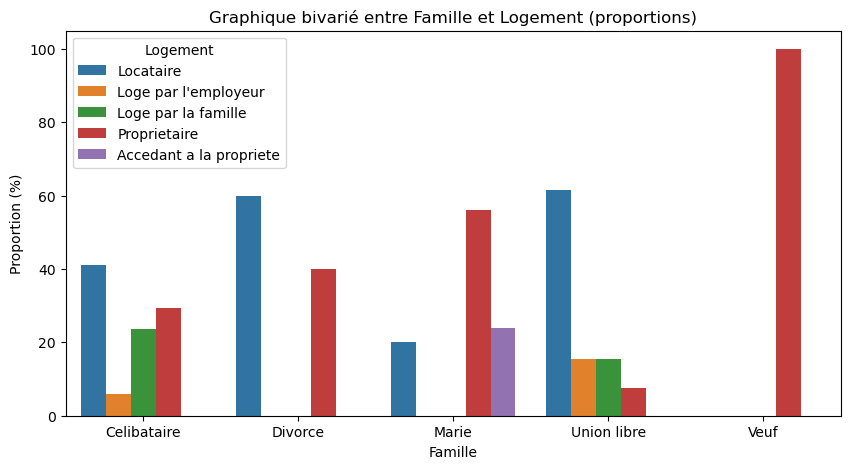

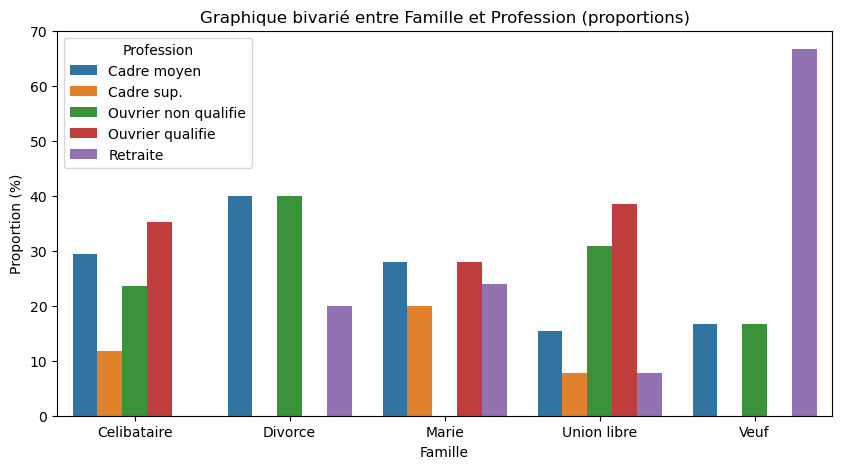

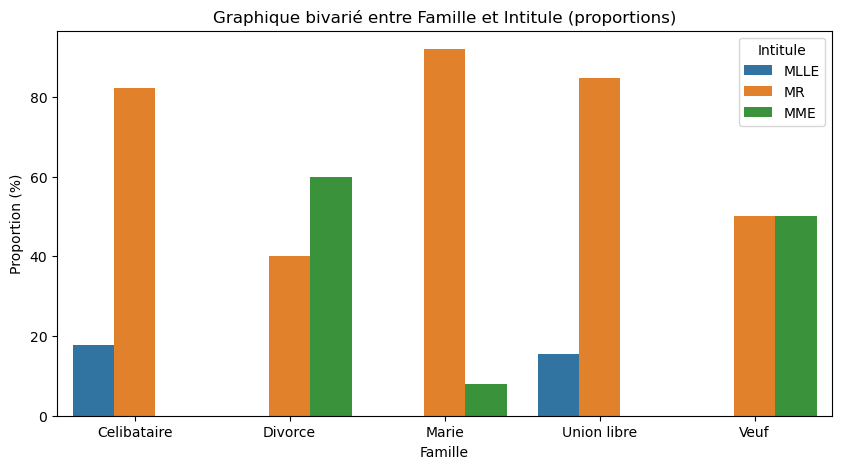

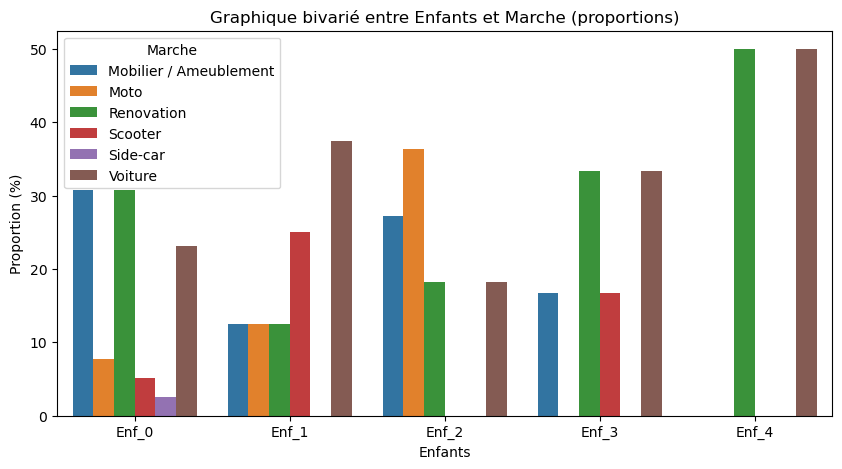

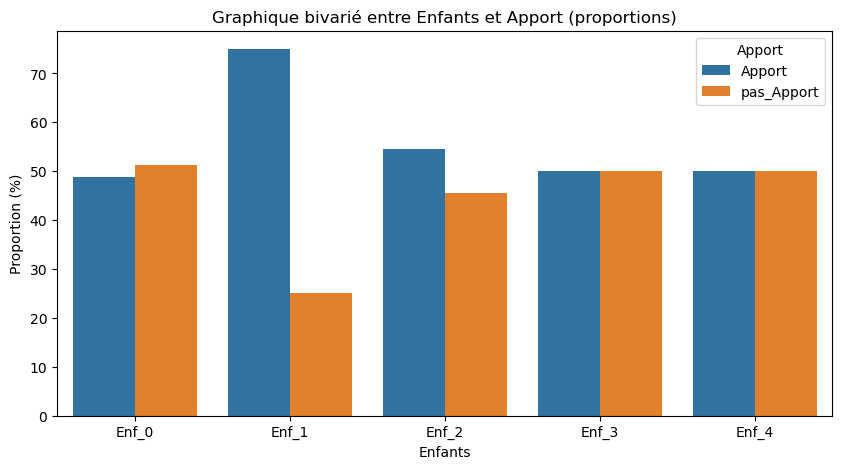

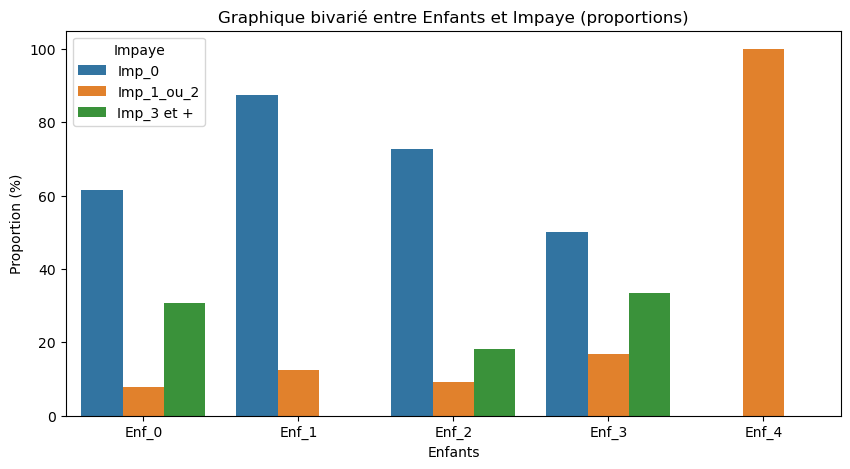

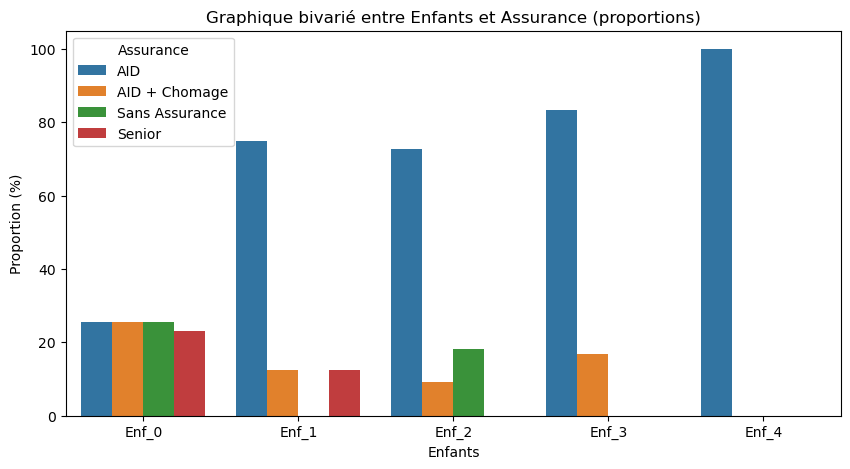

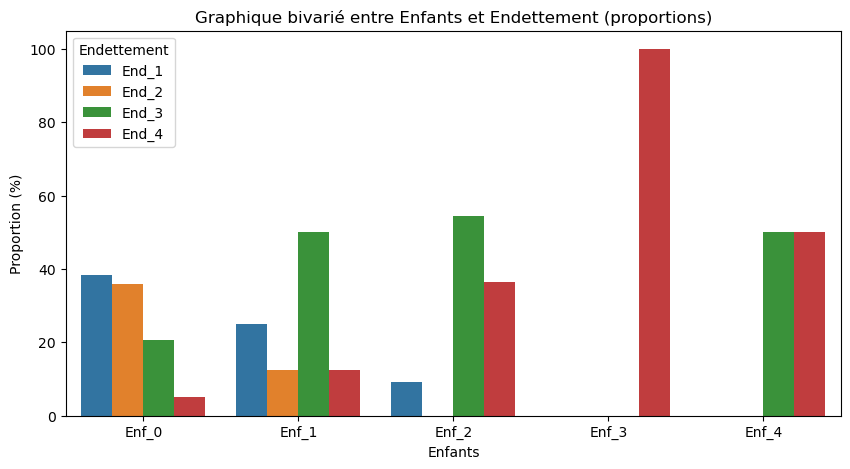

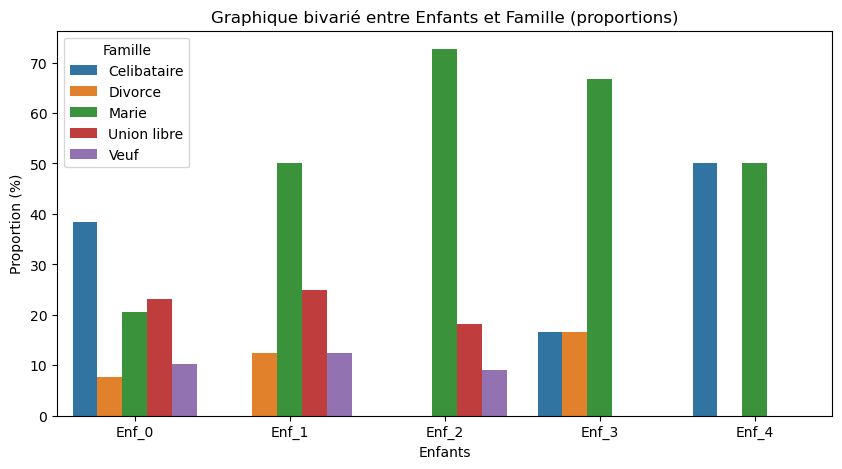

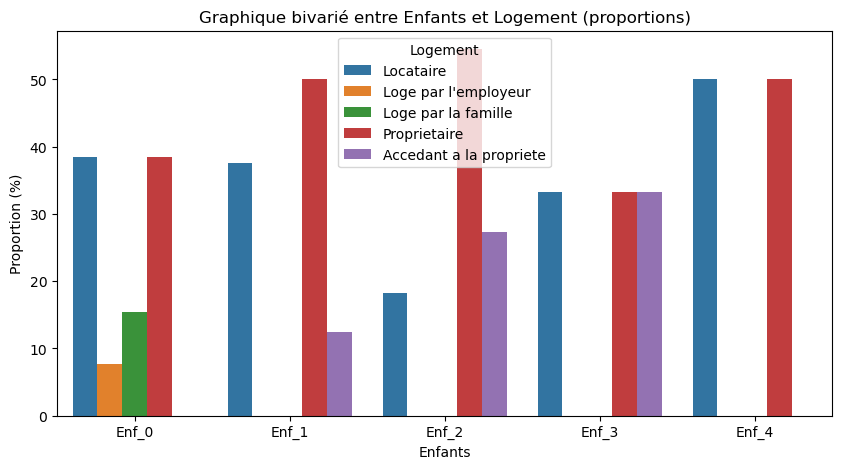

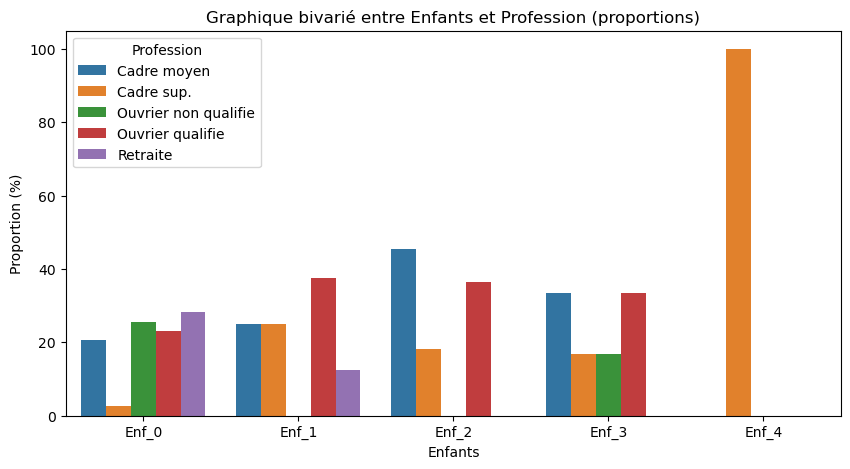

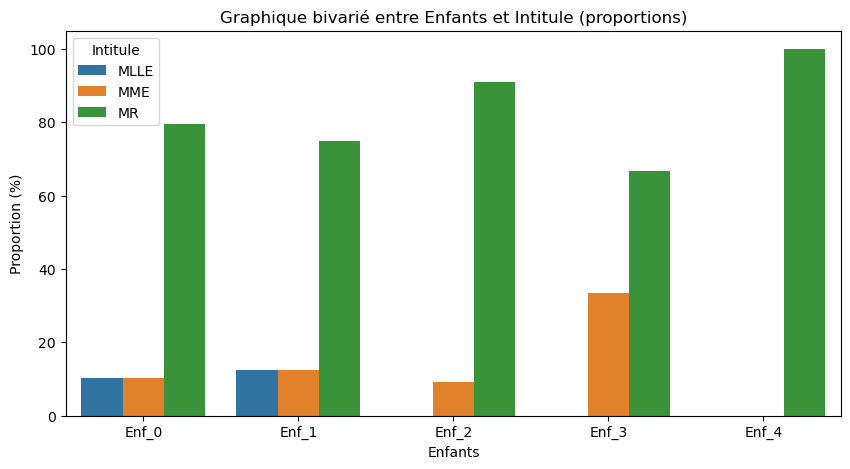

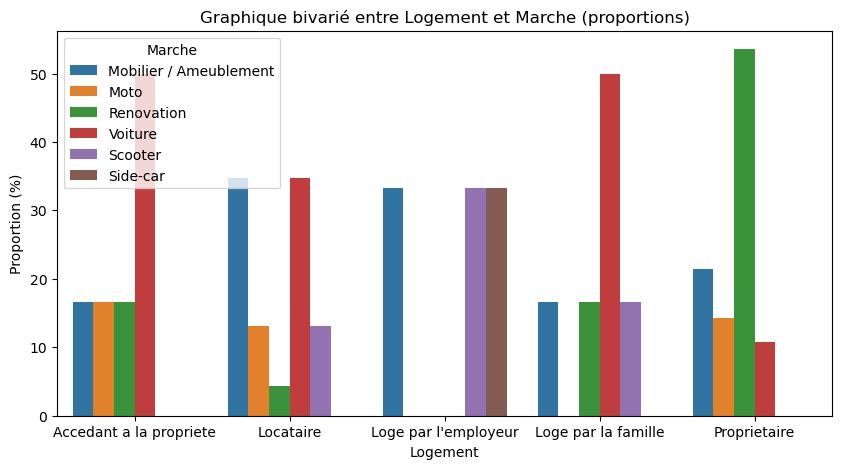

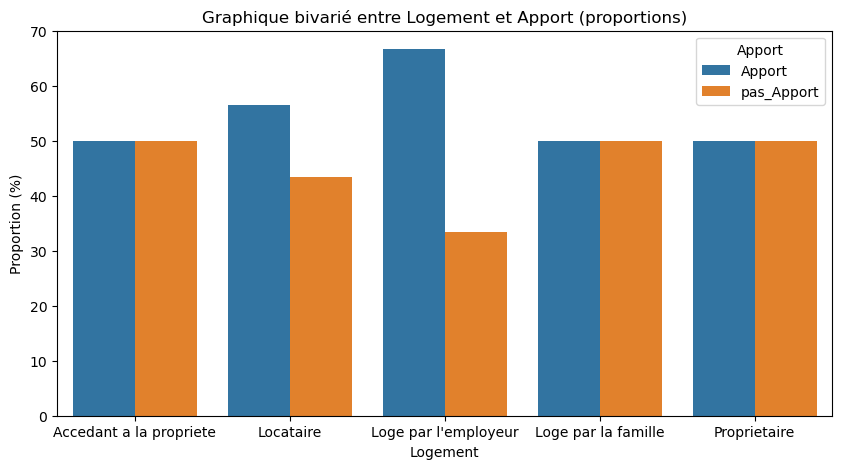

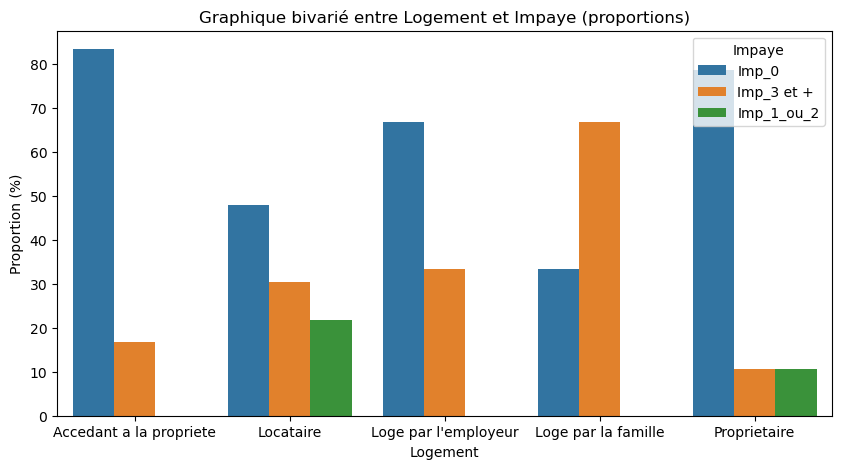

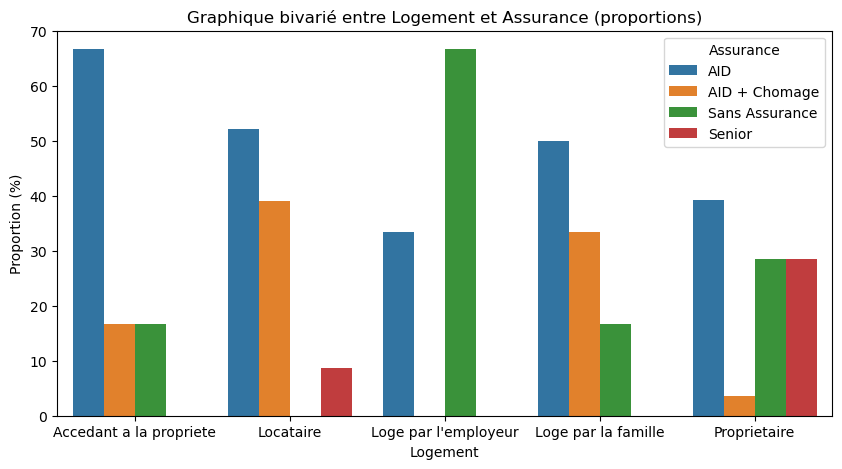

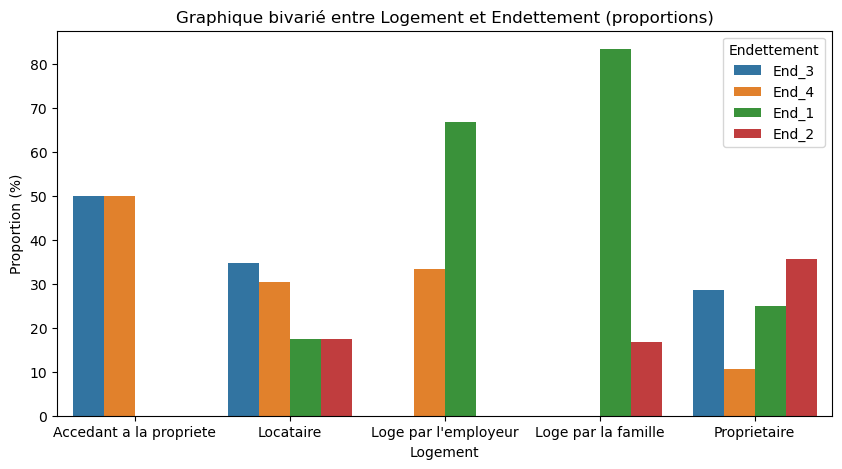

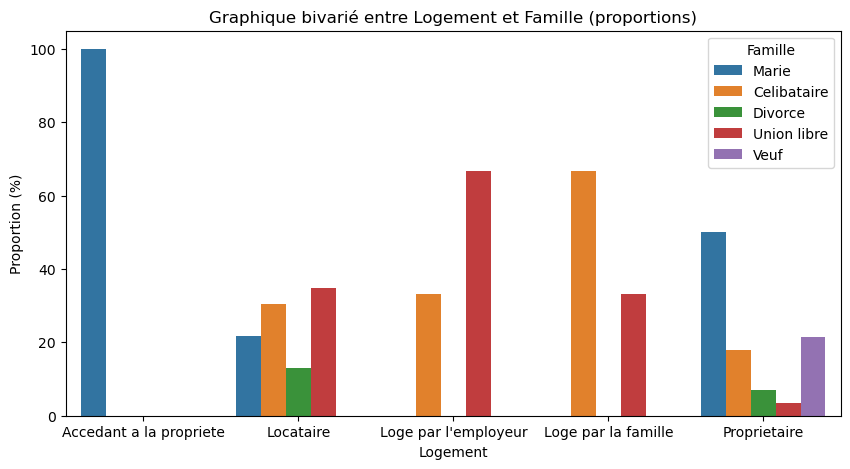

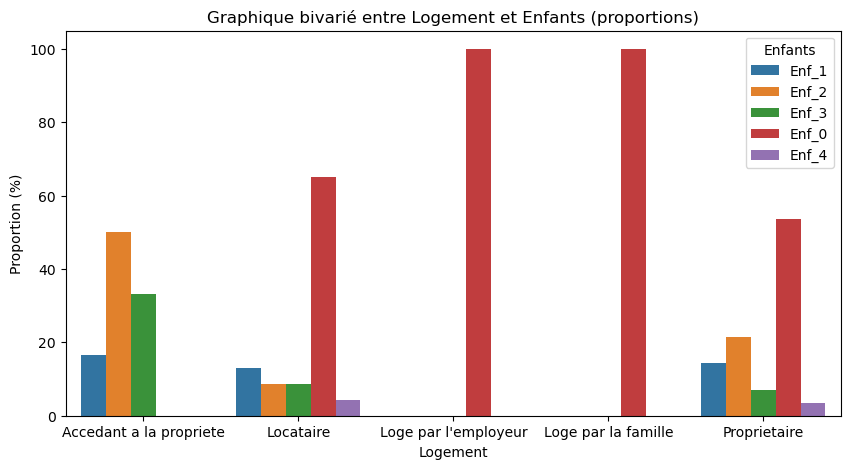

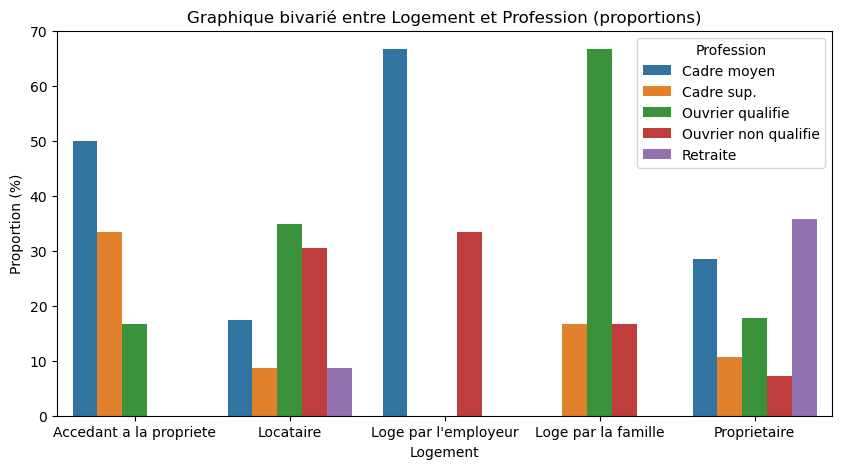

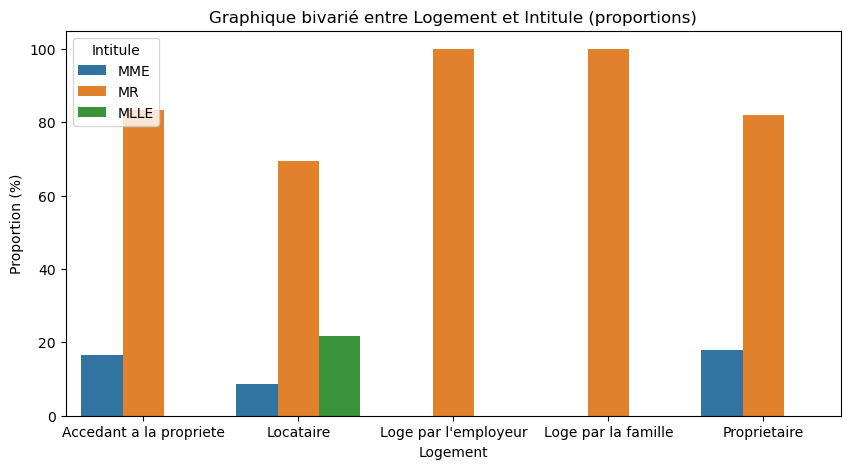

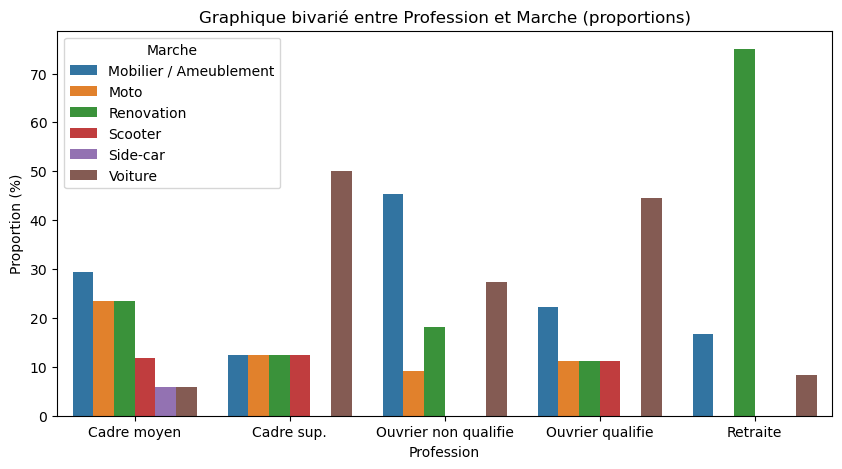

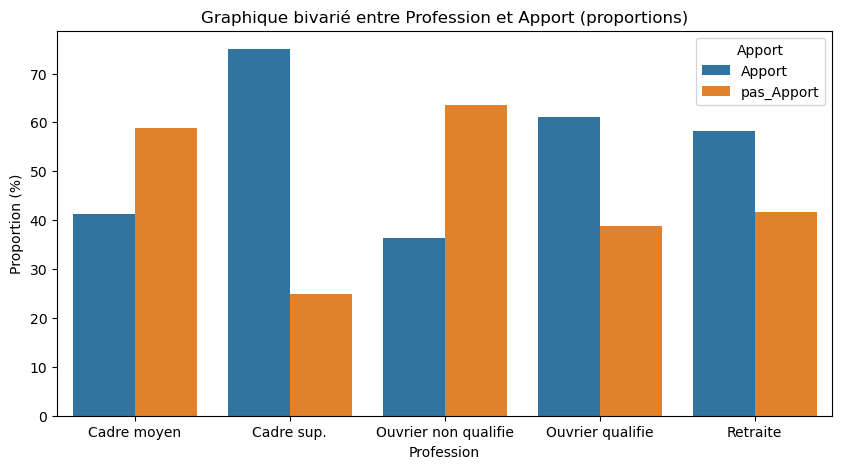

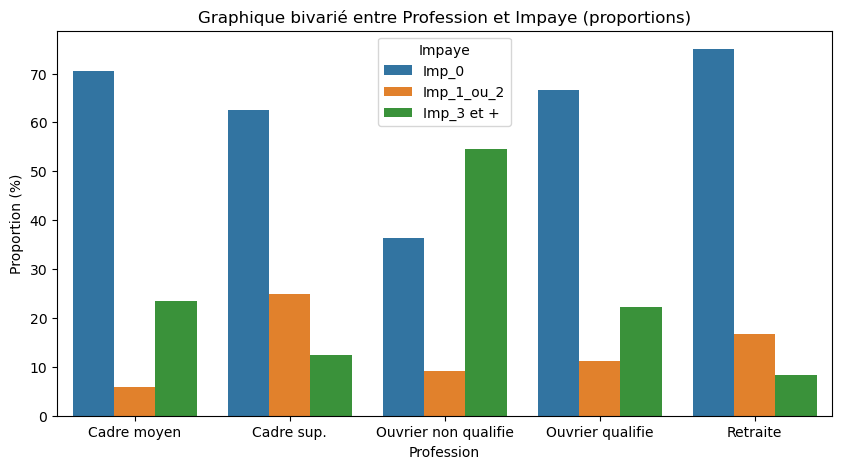

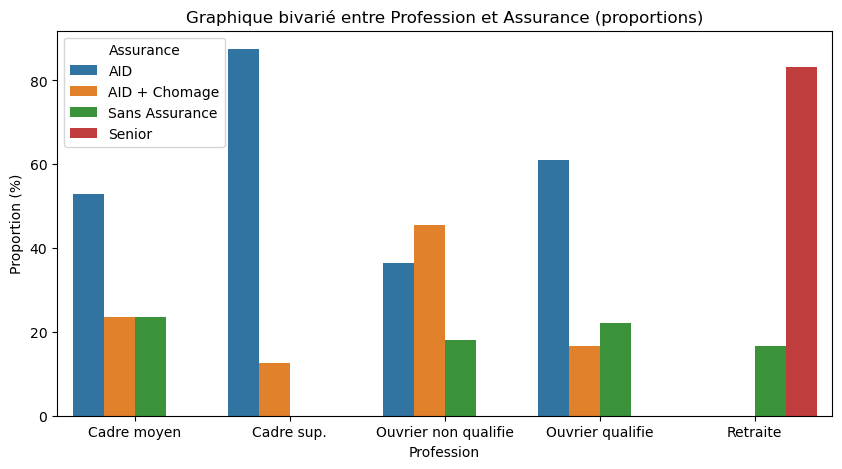

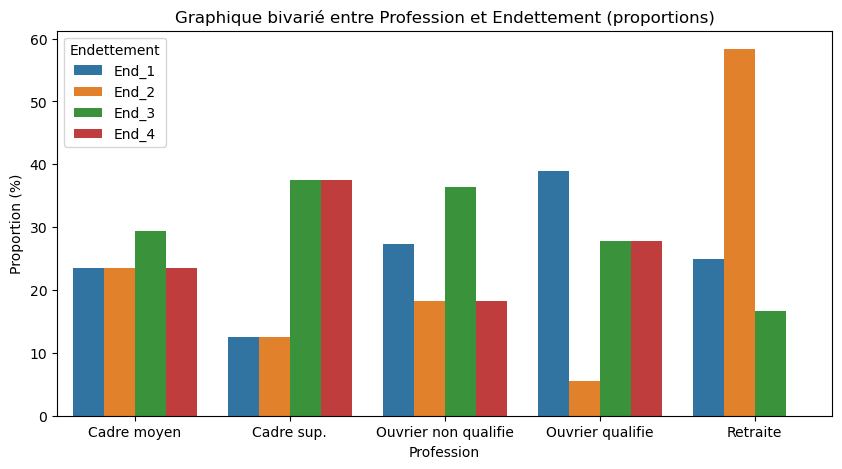

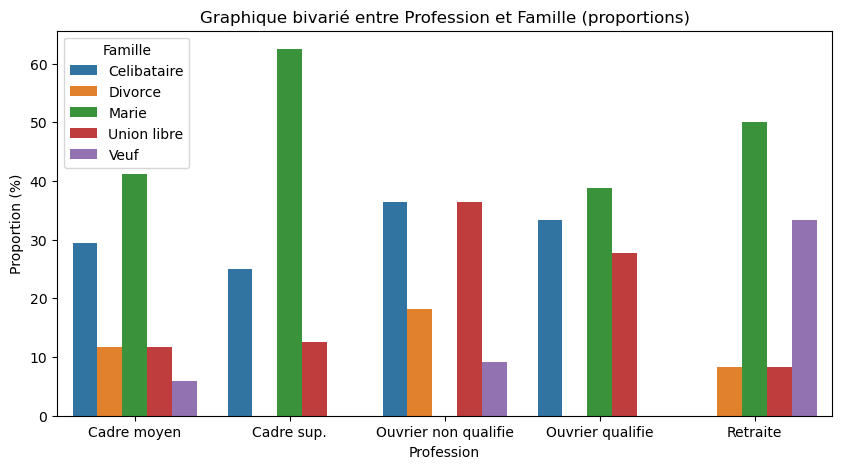

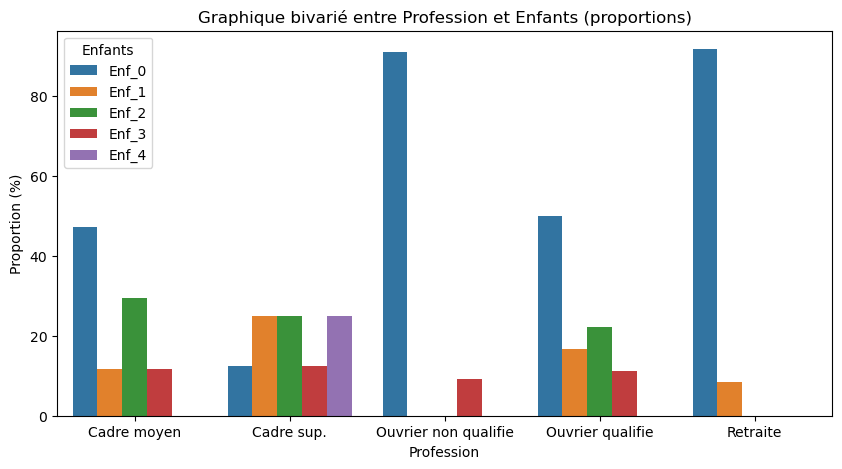

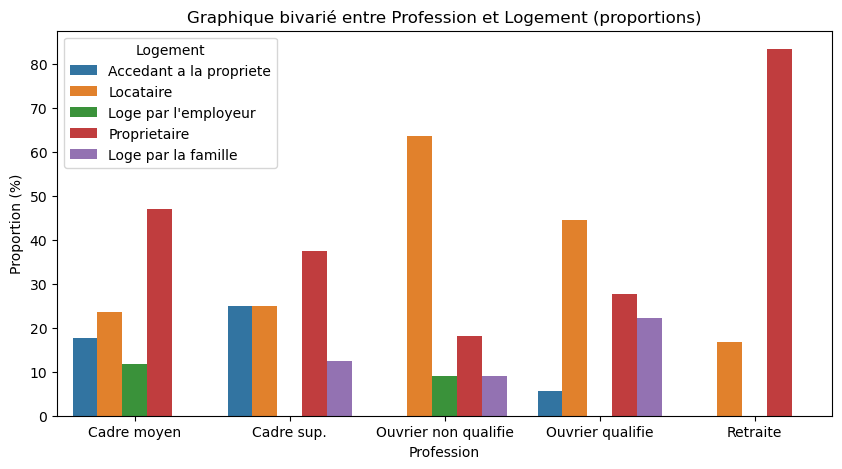

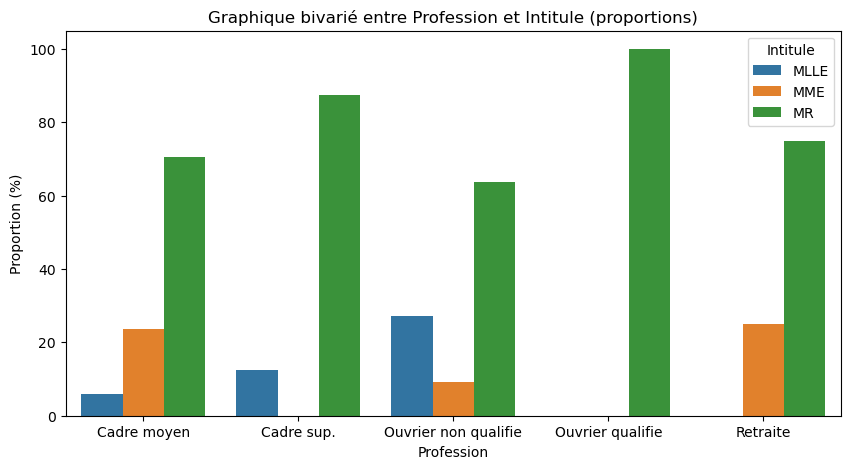

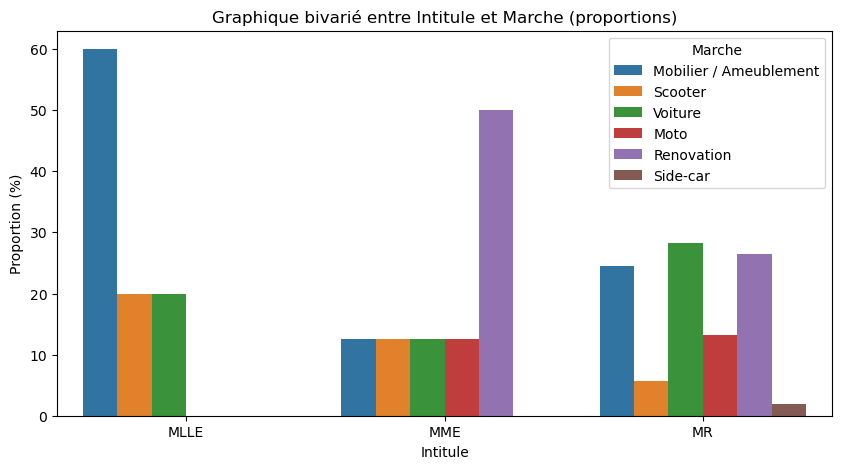

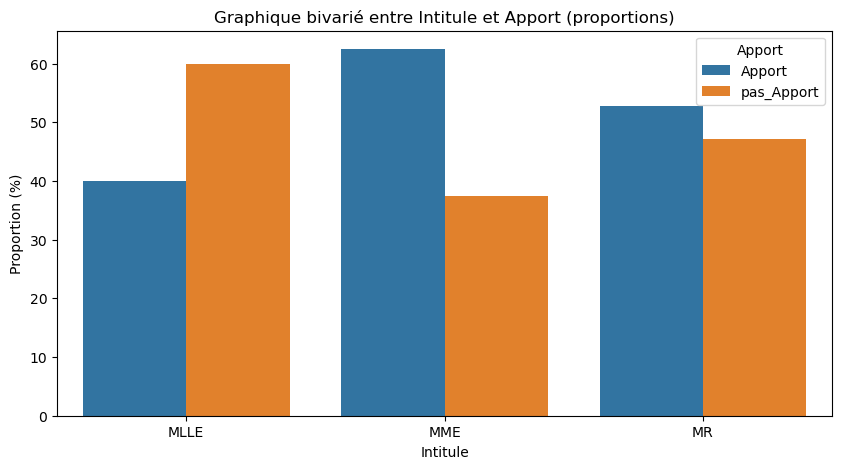

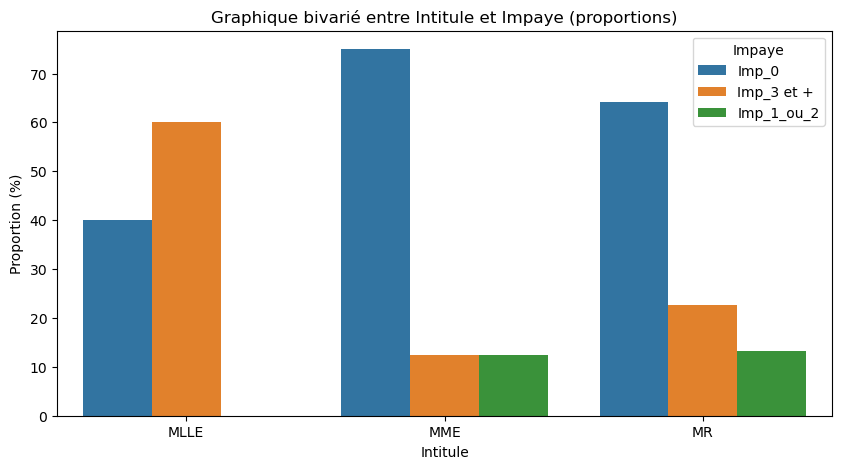

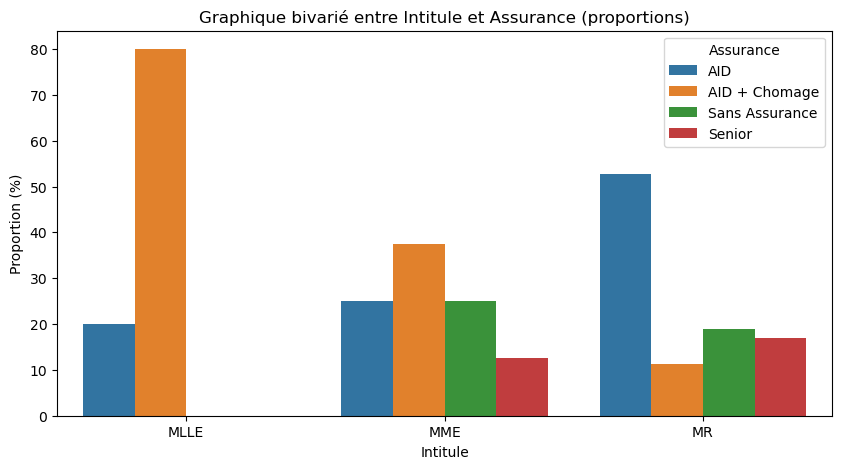

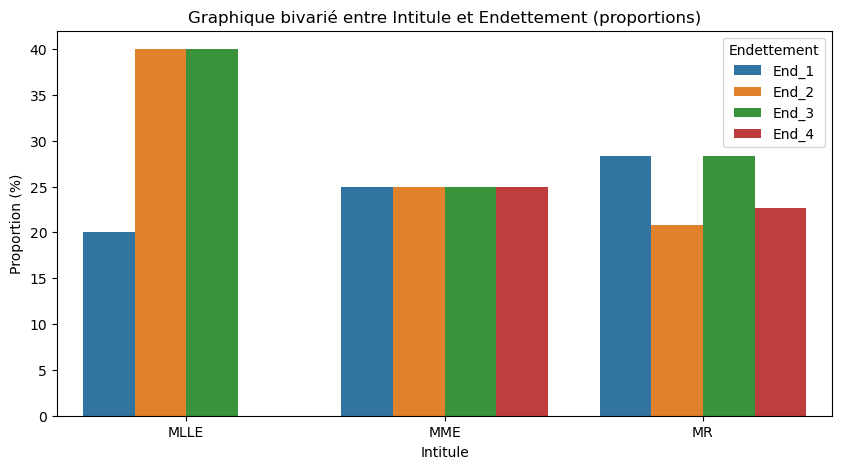

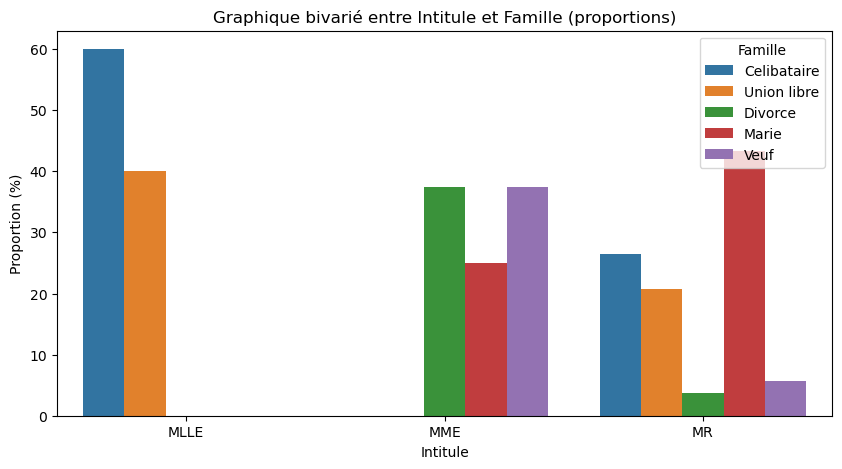

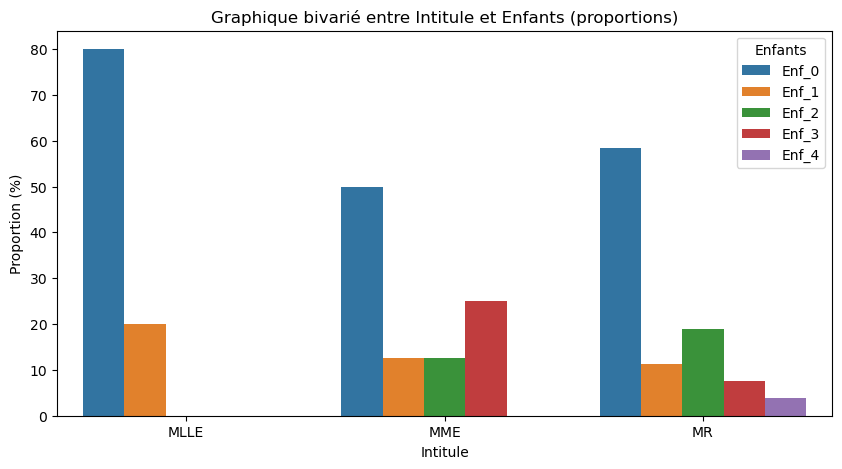

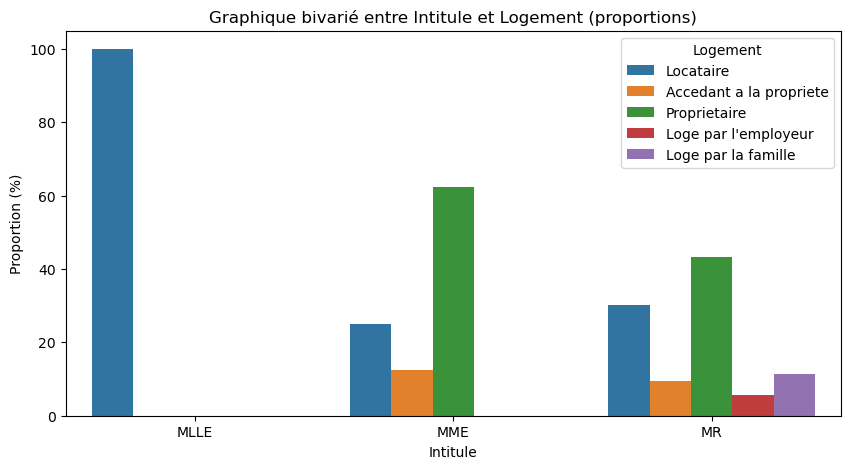

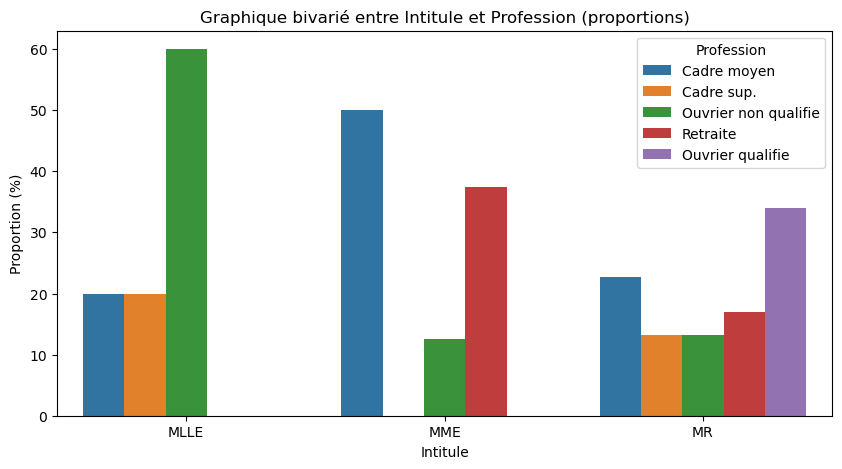

In [14]:
# Liste des variables qualitatives
categorical_columns = ['Marche', 'Apport', 'Impaye', 'Assurance', 'Endettement', 'Famille', 'Enfants', 'Logement', 'Profession', 'Intitule']
# Créer des graphiques bivariés pour chaque paire de variables qualitatives
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            # Calculer les proportions pour le graphique bivarié
            proportions = credit_data.groupby([col1, col2]).size().reset_index(name='Count')
            proportions['Proportion'] = proportions['Count'] / proportions.groupby(col1)['Count'].transform('sum') * 100

            # Créer un graphique en barres empilées pour la paire de variables
            plt.figure(figsize=(10, 5))
            sns.barplot(x=col1, y='Proportion', hue=col2, data=proportions)
            plt.title(f"Graphique bivarié entre {col1} et {col2} (proportions)")
            plt.ylabel('Proportion (%)')
            plt.show()

## Les tests statistiques

In [15]:
from scipy.stats import chi2_contingency

# Initialiser les DataFrame pour les coefficients de Cramér et les p-values
cramer_v_df = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
p_value_df = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
tschuprow_t_df = pd.DataFrame(index=categorical_columns, columns=categorical_columns)


# Calculer le test de chi-deux pour chaque paire de variables qualitatives
for i, column1 in enumerate(categorical_columns):
    for j, column2 in enumerate(categorical_columns):
        if column1 != column2:
            contingency_table = pd.crosstab(credit_data[column1], credit_data[column2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            cramer_v = np.sqrt(chi2 / (credit_data.shape[0] * (min(contingency_table.shape) - 1)))
            tschuprow_t = cramer_v * np.sqrt((contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1) / (credit_data.shape[0] - 1))
            cramer_v_df.loc[column1, column2] = cramer_v
            tschuprow_t_df.loc[column1, column2] = tschuprow_t
            p_value_df.loc[column1, column2] = p

            
 
# Afficher la DataFrame des p-values
print("\nDataFrame des p-values :")
p_value_df.style.set_properties(**{'border-color': 'black', 'border-width': '1px', 'border-style': 'solid'})           



DataFrame des p-values :


In [16]:
# Afficher la DataFrame des coefficients de Cramér
print("DataFrame des coefficients de Cramér :")
cramer_v_df.style.background_gradient(cmap='Greens', high=0.4, low=0).set_properties(**{'border-color': 'black', 'border-width': '1px', 'border-style': 'solid'})


DataFrame des coefficients de Cramér :


In [17]:

# Afficher la DataFrame des coefficients de Tchuprow
print("\nDataFrame des coefficients de Tchuprow :")
tschuprow_t_df.style.background_gradient(cmap='Greens', high=0.4, low=0).set_properties(**{'border-color': 'black', 'border-width': '1px', 'border-style': 'solid'})



DataFrame des coefficients de Tchuprow :


# Analyse multivariées grâce à l'ACM

## ACM

In [47]:
import fanalysis.mca as mca

# Liste des variables qualitatives
categorical_columns = ['Marche', 'Assurance', 'Intitule', 'Impaye',  'Profession','Endettement']

X = credit_data[categorical_columns].values

In [19]:

df=credit_data
# Créer une instance de la classe MCA
my_mca = mca.MCA(row_labels=df.index.values, var_labels=categorical_columns)

In [20]:
# Estimation de l'ACM
my_mca.fit(X)

MCA(row_labels=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
    var_labels=['Marche', 'Assurance', 'Intitule', 'Impaye', 'Profession',
                'Endettement'])

## Aides à l'interprétation

### Choix du nombre d'axe factorie frâce à l'analyse des valeurs propres


In [21]:
print(my_mca.eig_)

[[4.45692632e-01 3.42815647e-01 2.94260346e-01 2.55204723e-01
  2.32060207e-01 2.00874874e-01 1.80355837e-01 1.76024083e-01
  1.59261730e-01 1.52363536e-01 1.40611459e-01 1.20144581e-01
  1.02085181e-01 8.82631186e-02 8.43641515e-02 7.22202857e-02
  6.40426367e-02 4.63392362e-02 9.68240304e-03]
 [1.40745042e+01 1.08257573e+01 9.29243196e+00 8.05909653e+00
  7.32821706e+00 6.34341707e+00 5.69544748e+00 5.55865524e+00
  5.02931780e+00 4.81148007e+00 4.44036186e+00 3.79403939e+00
  3.22374255e+00 2.78725638e+00 2.66413110e+00 2.28064060e+00
  2.02239905e+00 1.46334430e+00 3.05760096e-01]
 [1.40745042e+01 2.49002614e+01 3.41926934e+01 4.22517899e+01
  4.95800070e+01 5.59234241e+01 6.16188715e+01 6.71775268e+01
  7.22068446e+01 7.70183247e+01 8.14586865e+01 8.52527259e+01
  8.84764685e+01 9.12637249e+01 9.39278560e+01 9.62084966e+01
  9.82308956e+01 9.96942399e+01 1.00000000e+02]]


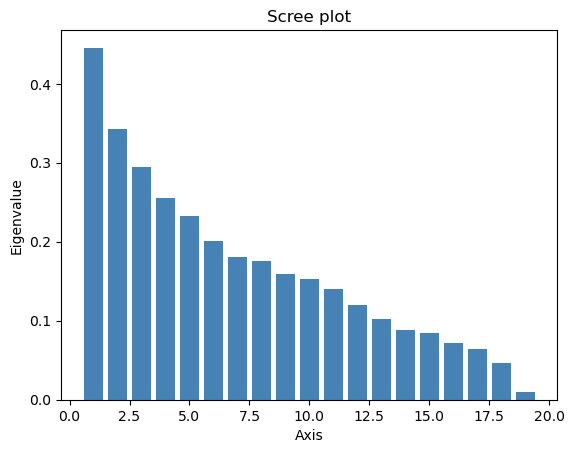

In [22]:
# Graphique des valeurs propres 

my_mca.plot_eigenvalues()

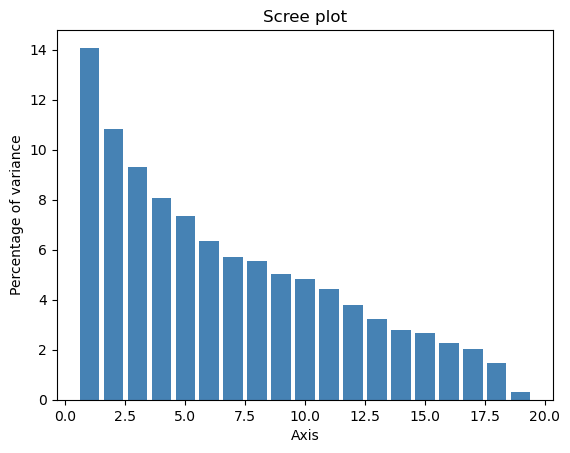

In [23]:

# Pourcentage de variance expliqué
my_mca.plot_eigenvalues(type="percentage")

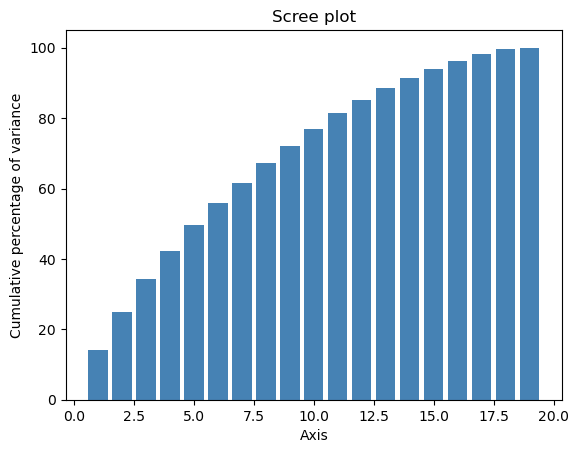

In [24]:
# Variance expliquée cumulée
my_mca.plot_eigenvalues(type="cumulative")

### Analyse de la qualité de représentation en ligne

In [25]:
df_rows = my_mca.row_topandas()
print(df_rows)

    row_coord_dim1  row_coord_dim2  row_coord_dim3  row_coord_dim4  \
0        -0.052761        0.087667       -0.243399        0.186003   
1        -0.541548       -0.130431       -0.508997        0.303325   
2         0.393778       -0.540740       -0.078564        0.452163   
3        -1.531751        0.054821        0.369057        0.209774   
4         0.688232       -0.348121        0.310576       -0.530272   
..             ...             ...             ...             ...   
61        0.074481        0.645569       -0.594963       -0.721647   
62        0.200110        0.771481        0.198467        0.123476   
63        0.154341        0.332831        0.435073       -0.328709   
64        0.590794       -0.258467        0.620012        0.588328   
65       -1.491797       -0.119584        0.915796        0.122653   

    row_coord_dim5  row_coord_dim6  row_coord_dim7  row_coord_dim8  \
0         0.197176       -0.130743       -0.042048        0.078388   
1        -0.229767 

### Qualité de représentation

#### Qualité profil ligne (individus)

Premier Axe


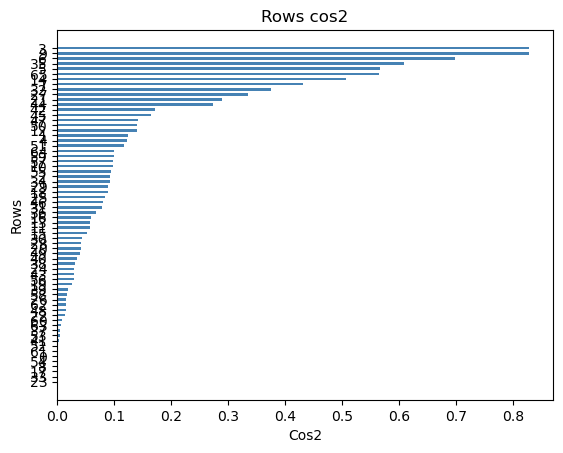

Deuxième  Axe


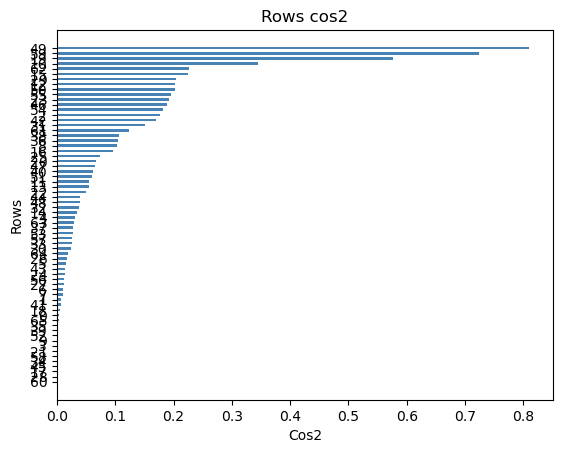

In [26]:
print("Premier Axe")

my_mca.plot_row_cos2(num_axis=1)
print("Deuxième  Axe")

my_mca.plot_row_cos2(num_axis=2)

#### Qualité profil colonnes (modalités des variables)

Premier Axe


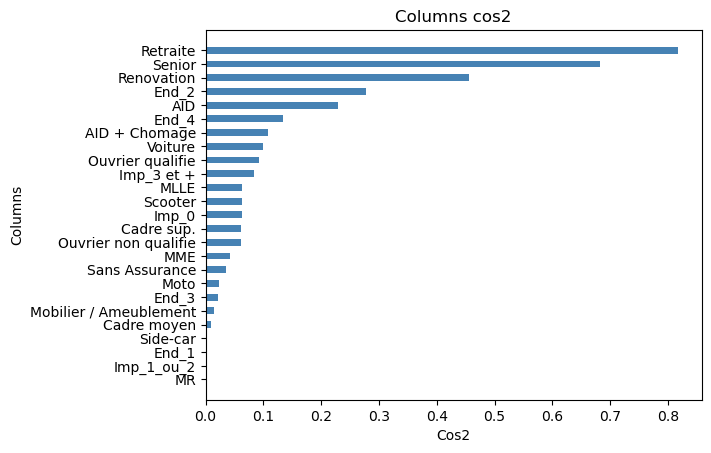

Deuxième  Axe


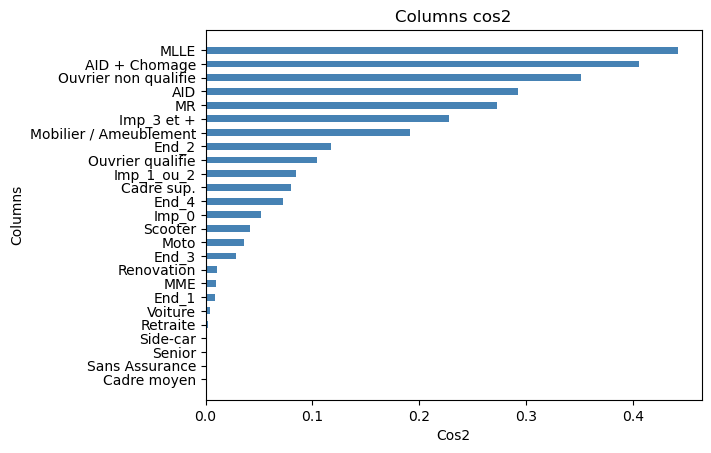

Troisième  Axe


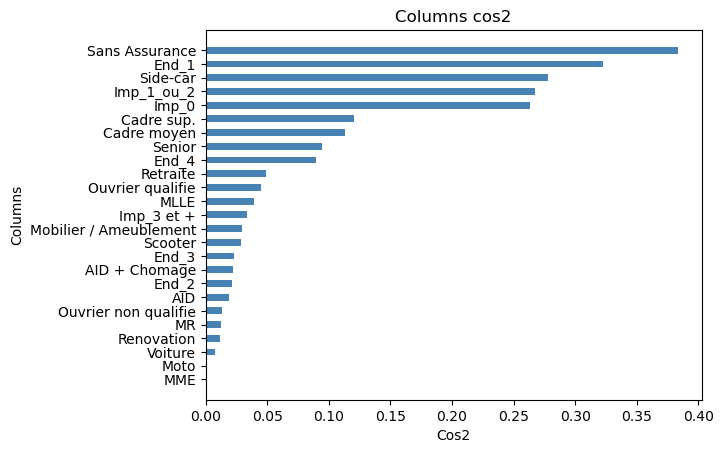

In [27]:
print("Premier Axe")

my_mca.plot_col_cos2(num_axis=1)
print("Deuxième  Axe")

my_mca.plot_col_cos2(num_axis=2)
print("Troisième  Axe")

my_mca.plot_col_cos2(num_axis=3)

#### Analyse des contributions

#### Contributions ligne

Premier Axe


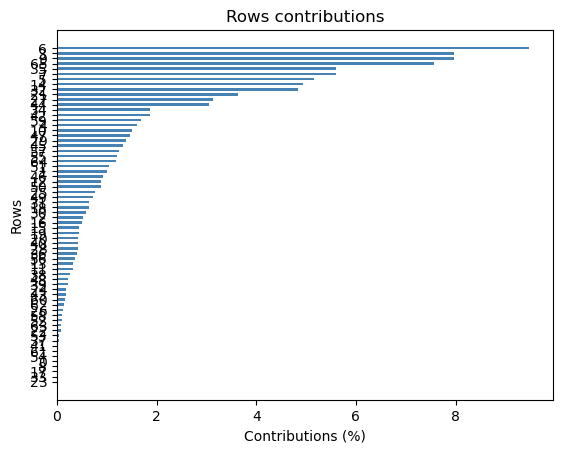

In [28]:
print("Premier Axe")

my_mca.plot_row_contrib(num_axis=1)

Deuxième  Axe


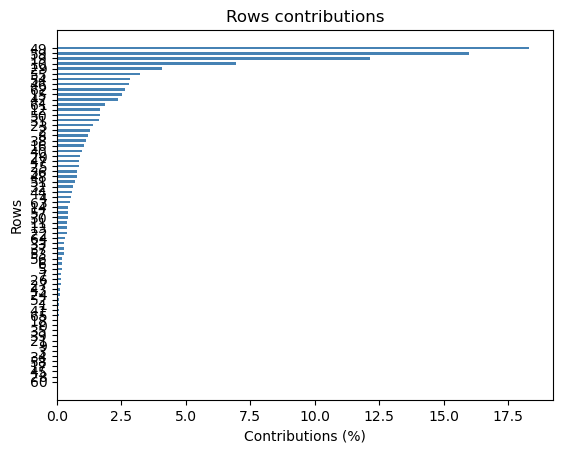

In [29]:
print("Deuxième  Axe")

my_mca.plot_row_contrib(num_axis=2)

#### Contribution profil colonne

Premier Axe


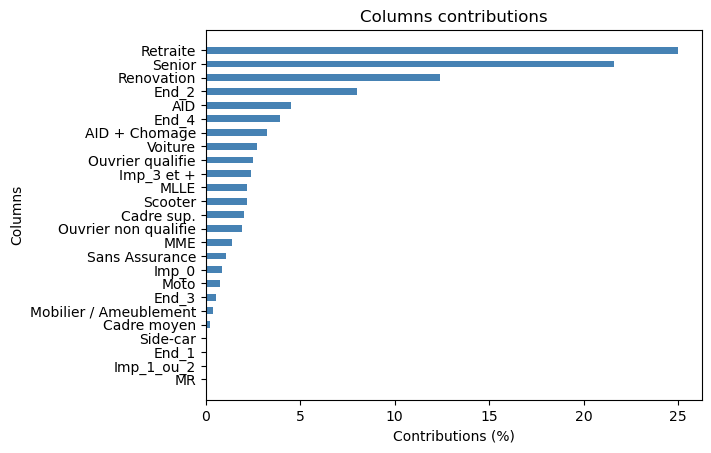

In [30]:
print("Premier Axe")
my_mca.plot_col_contrib(num_axis=1)

Deuxième  Axe


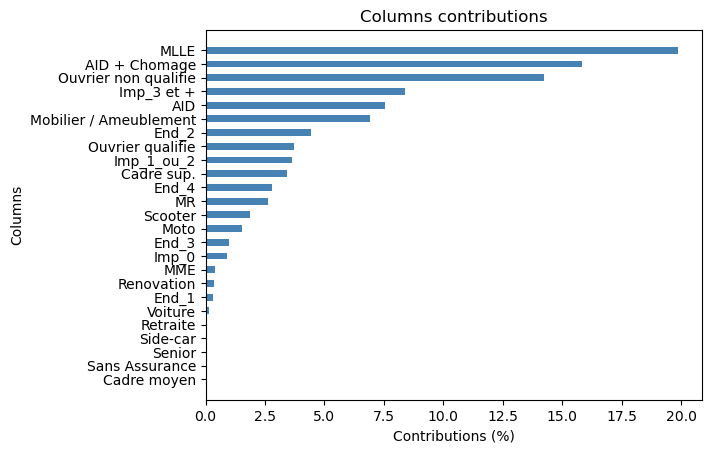

In [31]:
print("Deuxième  Axe")
my_mca.plot_col_contrib(num_axis=2)

## Interprétation graphiques

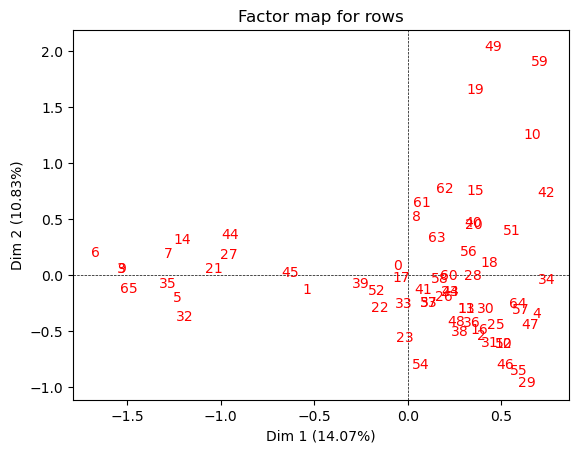

In [32]:
# Graphique profil ligne
my_mca.mapping_row(num_x_axis=1, num_y_axis=2)

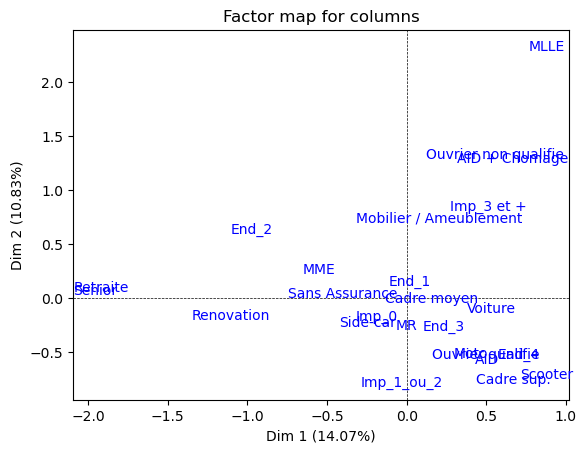

In [33]:
# Graphique des points colonnes
my_mca.mapping_col(num_x_axis=1, num_y_axis=2)

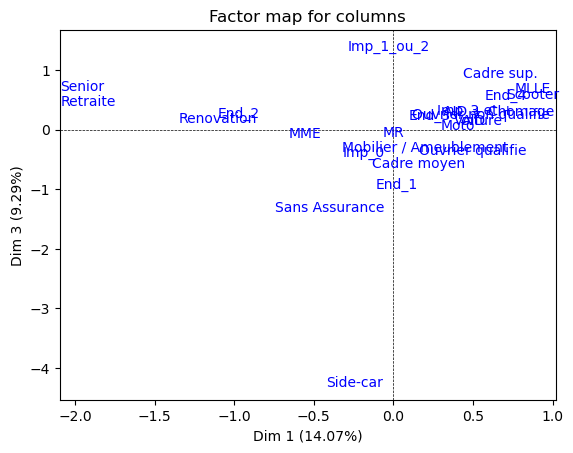

In [34]:
# Graphique des points colonnes
my_mca.mapping_col(num_x_axis=1, num_y_axis=3)

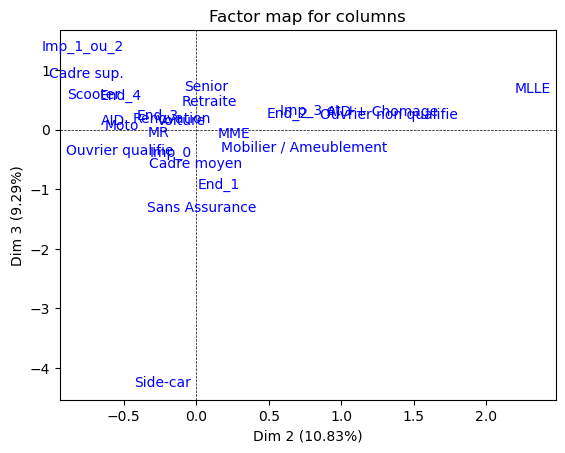

In [35]:
# Graphique des points colonnes
my_mca.mapping_col(num_x_axis=2, num_y_axis=3)

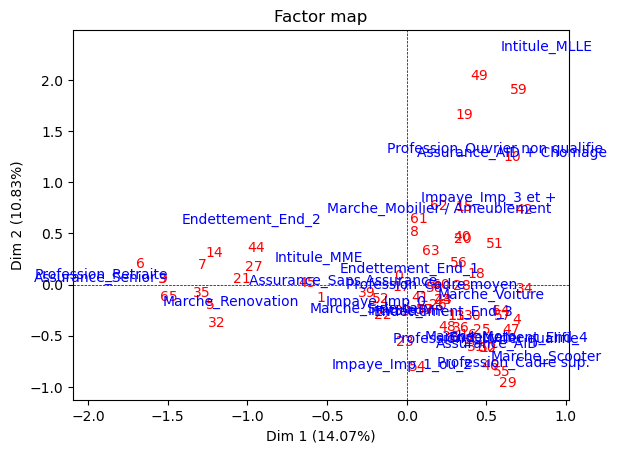

In [36]:
# Graphique superposition si nécessaire
my_mca.mapping(num_x_axis=1, num_y_axis=2, short_labels=False)